In [3]:
import glob
import os
import gc
import pickle
import colorcet as cc
from pathlib import Path
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mne
import mne_bids

from wordfreq import zipf_frequency
from tqdm import tqdm
import scipy

In [4]:
nc_1 = np.load("predictions_results_meg/subject_1_kernel_ridge.npy")
# con_corr_1 = np.load("./meg_sub1_predictions/bert_residual_syntax_lh_contrege_complete_predictions///0_corr.npy")[:, 0]
con_corr_1 = np.load("../../Research/pred/meg_sub1_predictions/audio_joint_embeddings_predictions/0_corr.npy")[:, 0]
con_in_corr_1 = np.load("./meg_sub1_predictions/bert_residual_syntax_lh_contrege_incomplete_predictions///0_corr.npy")[:, 0]
in_corr_1 = np.load("./meg_sub1_predictions/bert_residual_syntax_lh_incontrege_predictions///0_corr.npy")[:, 0]

FileNotFoundError: [Errno 2] No such file or directory: 'predictions_results_meg/subject_1_kernel_ridge.npy'

In [40]:
normalized_con_corr = con_corr_1 / nc_1
normalized_con_corr[normalized_con_corr > 1.0] = 1.0
normalized_con_corr[normalized_con_corr < -1.0] = -1.0
normalized_con_corr[nc_1 <= 0.005] = 0.0

In [41]:
normalized_con_in_corr = con_in_corr_1 / nc_1
normalized_con_in_corr[normalized_con_in_corr > 1.0] = 1.0
normalized_con_in_corr[normalized_con_in_corr < -1.0] = -1.0
normalized_con_in_corr[nc_1 <= 0.005] = 0.0

In [42]:
normalized_in_corr = in_corr_1 / nc_1
normalized_in_corr[normalized_in_corr > 1.0] = 1.0
normalized_in_corr[normalized_in_corr < -1.0] = -1.0
normalized_in_corr[nc_1 <= 0.005] = 0.0

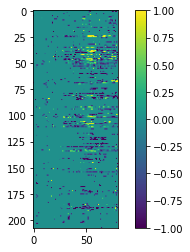

In [65]:
plt.imshow(normalized_con_corr.reshape(208, 81))
plt.colorbar()
plt.show()

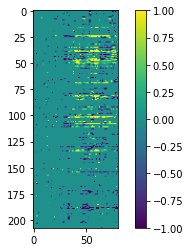

In [66]:
plt.imshow(normalized_con_in_corr.reshape(208, 81))
plt.colorbar()
plt.show()

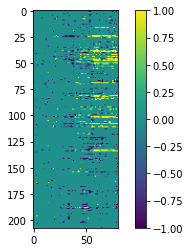

In [67]:
plt.imshow(normalized_in_corr.reshape(208, 81))
plt.colorbar()
plt.show()

In [2]:
bids_path = mne_bids.BIDSPath(
    subject="01", session="0", task="0", datatype="meg", root="./"
)
raw = mne_bids.read_raw_bids(bids_path).load_data().filter(0.5, 30.0, n_jobs=1)

Extracting SQD Parameters from sub-01/ses-0/meg/sub-01_ses-0_task-0_meg.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.
Reading events from sub-01/ses-0/meg/sub-01_ses-0_task-0_events.tsv.
Reading channel info from sub-01/ses-0/meg/sub-01_ses-0_task-0_channels.tsv.
The stimulus channel "STI 014" is present in the raw data, but not included in channels.tsv. Removing the channel.
Reading 0 ... 395999  =      0.000 ...   395.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff fre

In [47]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(insig_corr.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.8, 16),
        ncols=4,
        vlim=(min(insig_corr), max(insig_corr)),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("bert_incontrege_corr1.pdf")

NameError: name 'insig_corr' is not defined

In [55]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(normalized_con_corr.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=[0.0,0.2,0.4,0.6],
        ncols=2,
        vlim=(-1, 1),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("bert-cc.pdf")

ValueError: Times should be between 0.0 and 0.08.

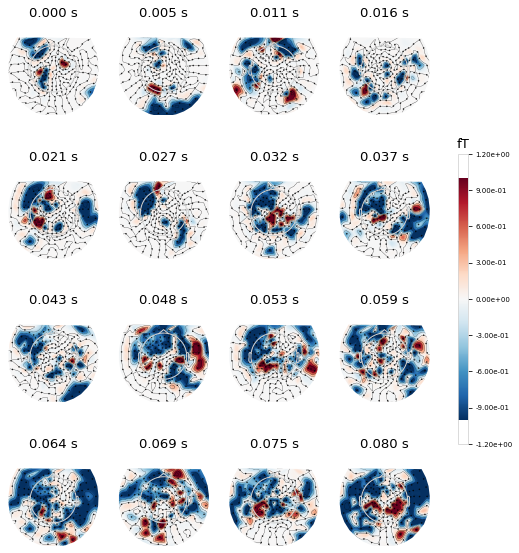

In [45]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(normalized_con_in_corr.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
        ncols=4,
        vlim=(-1, 1),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("bert-ci.pdf")

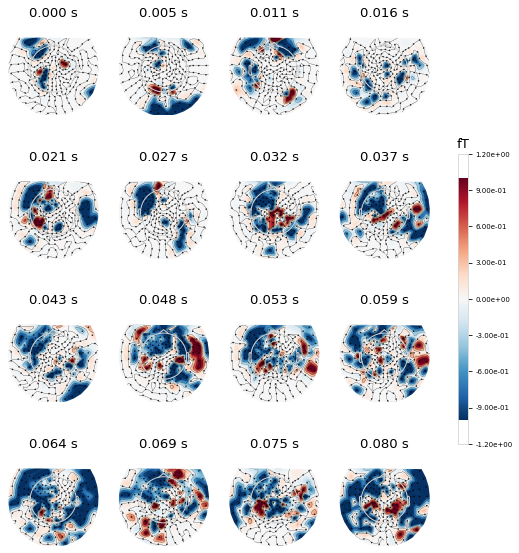

In [46]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(normalized_in_corr.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
        ncols=4,
        vlim=(-1, 1),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("bert-inc.pdf")

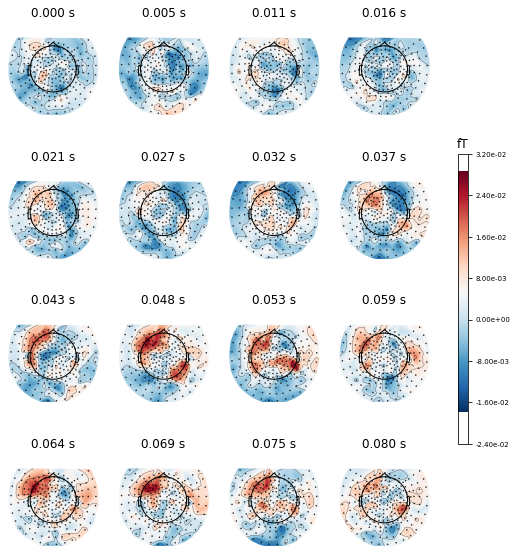

In [75]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(nc_1.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
        ncols=4,
        vlim=(min(nc_1), max(nc_1)),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("sub1.pdf")

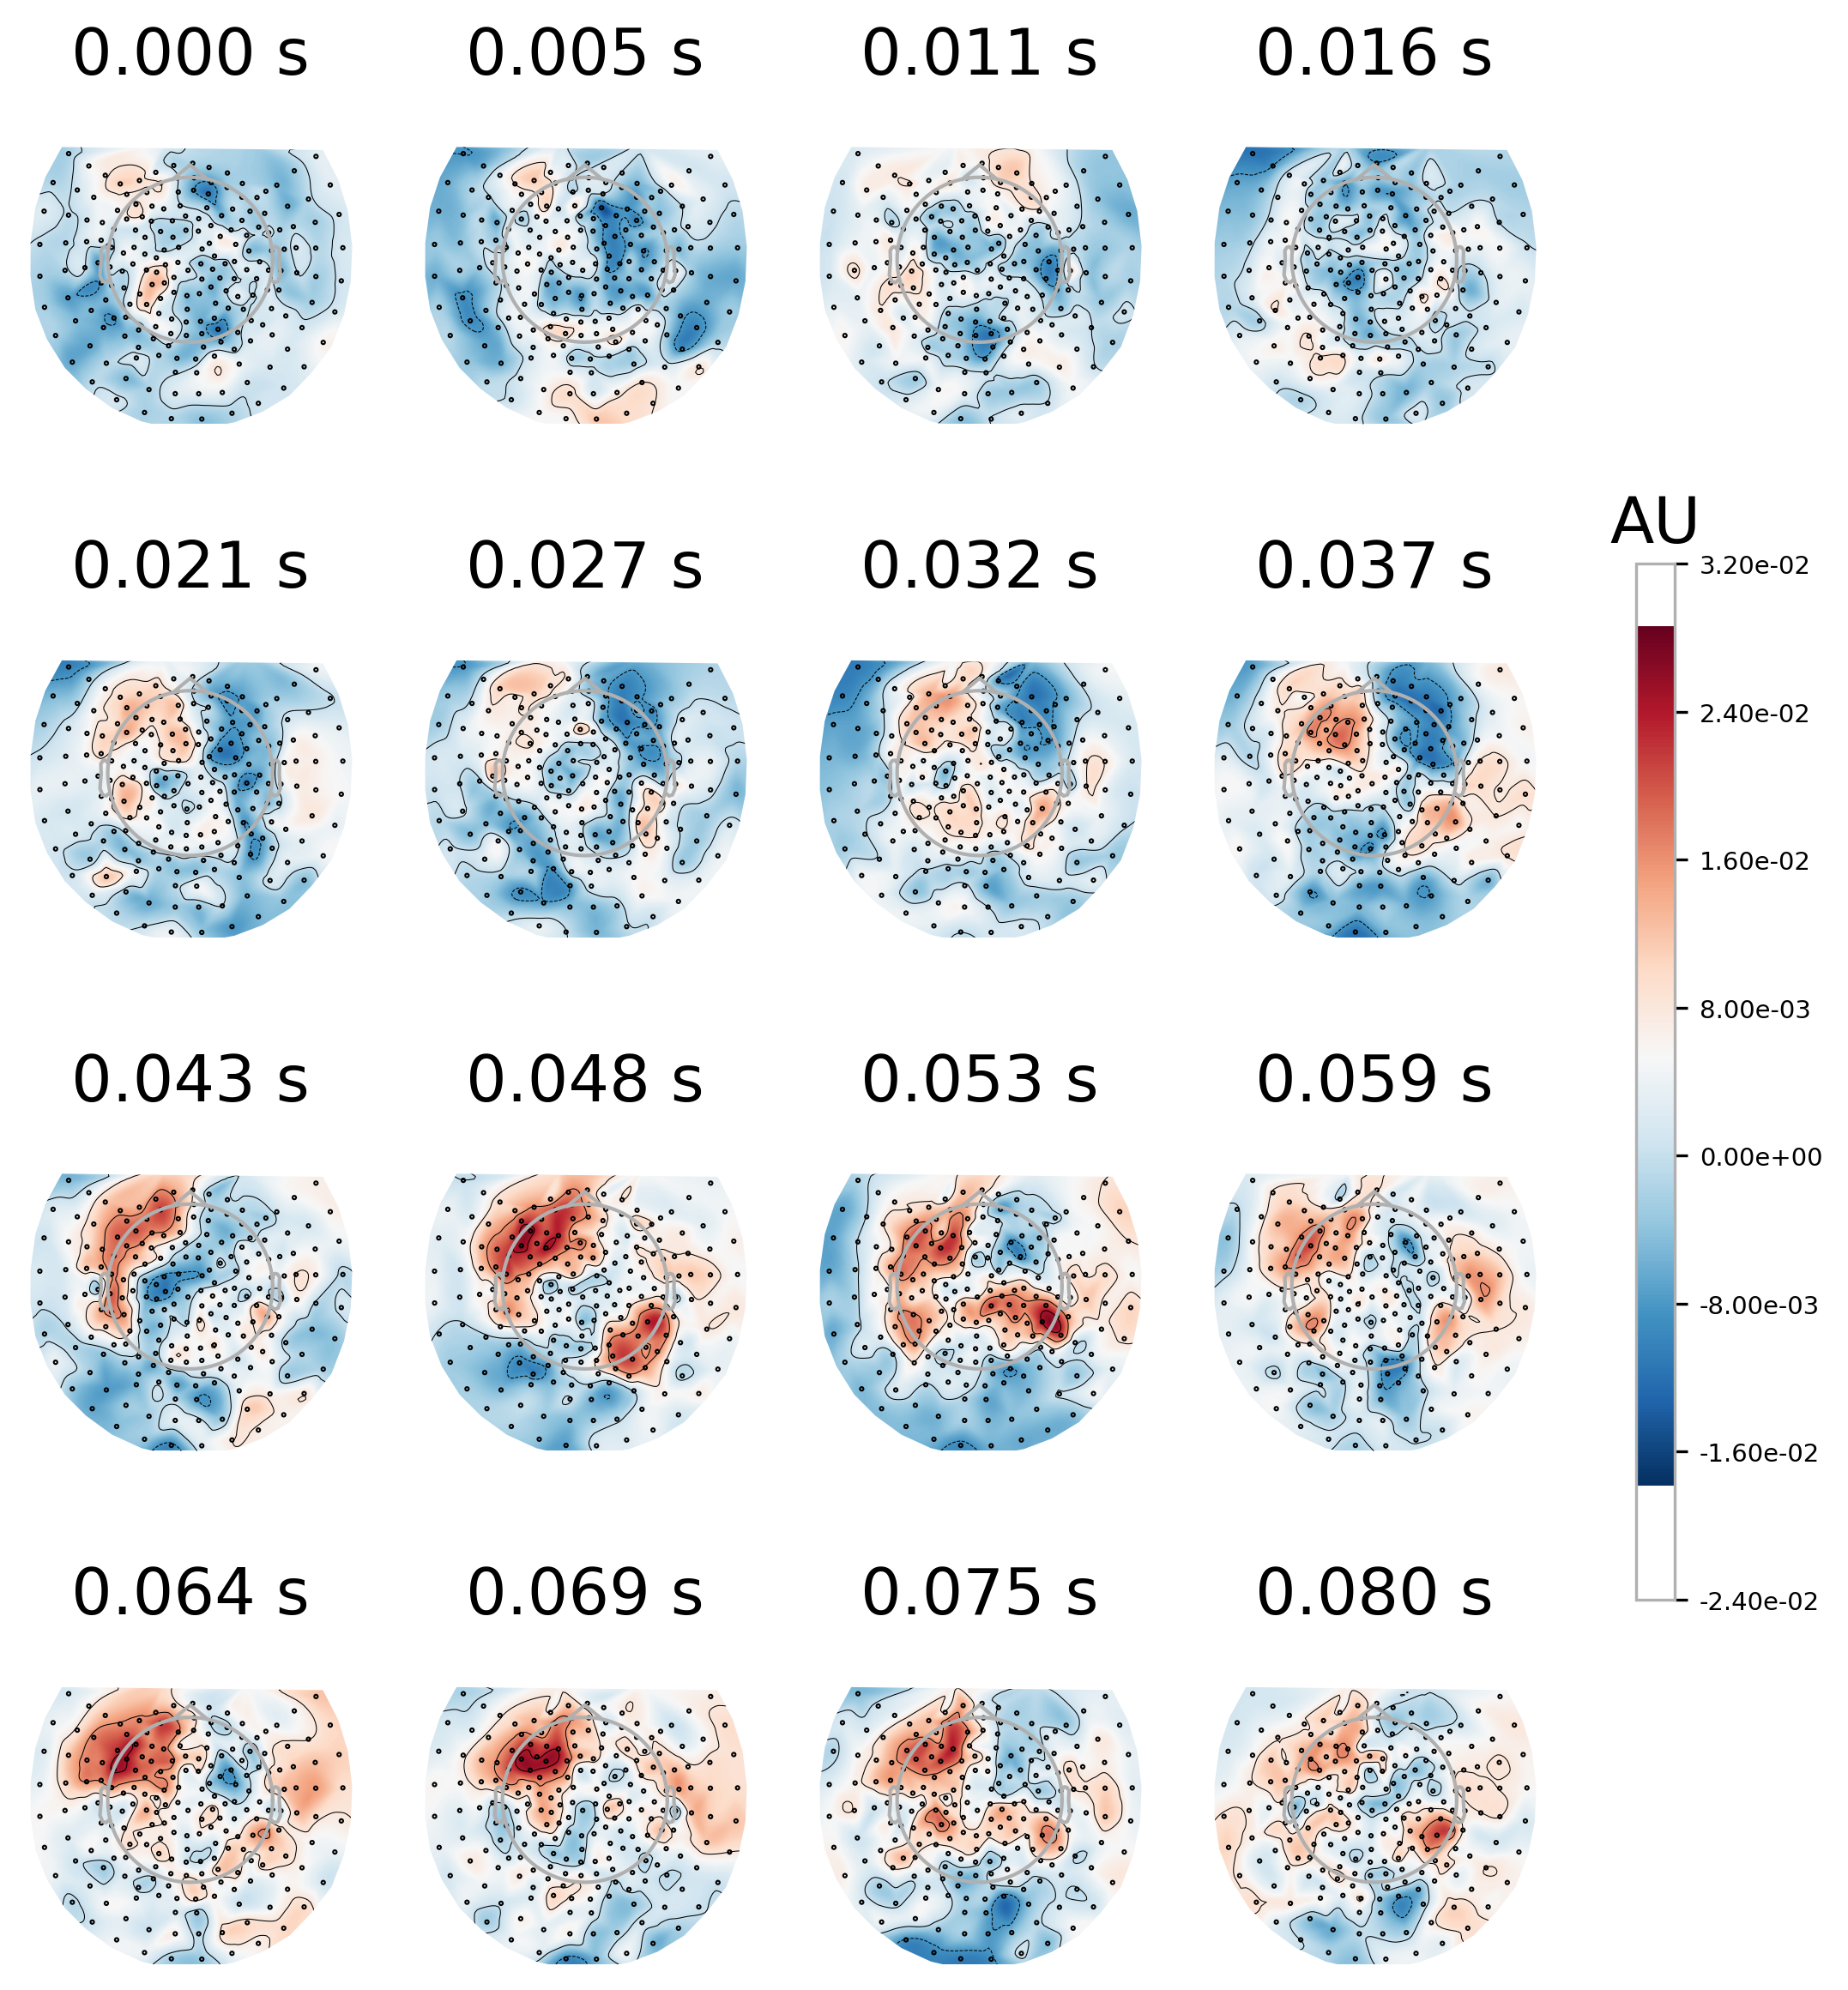

In [71]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(nc_1.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
                                 ncols=4,
        vlim=(min(nc_1), max(nc_1)),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("nc_1.pdf")

In [10]:
REPORTS = "../reports/"
REPORTS_DISK = "/media/nathan/Seagate Basic/meg-encoding/reports/"

In [132]:
cmap = cc.glasbey_hv
names = [
#     "BERT20", 
#     "BERT5",
#     #"BERT4",
#     "BERT1",
#     "BERT5-R",
#     "BERT20-R", 
#     "BERT5-lag1",
#     "BERT5-lag2",
#     "BERT5-lag3",
#     "BERT5-lag1-R",
#     "BERT5-lag2-R",
#     "BERT5-lag3-R",
#     "BERT5-res1",
#     "BERT5-res2",
#     "BERT5-res3",
#     "BERT5-res1-R",
#     "BERT5-res2-R",
#     "BERT5-res3-R",
    "GloVe", 
    "CM",
    "POS",
    "DEP",
]

colors = {n: cmap[i] for i, n in enumerate(names)}
colors["MEG"] = "gray"
# colors = {
#     "MEG": "gray", 
#     "BERT20": "#B03A2E", 
#     "BERT20-R": "#21618C",
#     "BERT5": "#F1948A",
#     "BERT4": "#229954",
#     "BERT5-R": "#85C1E9",
#     "BERT-res": "#AF7AC5", 
#     "GloVe": "#48C9B0",
#     "CM": "#873600",
#     "POS": "#F39C12", 
#     "DEP": "#F4D03F",
# }

In [7]:
with open("../data/meta/info-12-word-100Hz-800ms-simple-rescale.pkl", "rb") as fp:
    info = pickle.load(fp)

In [164]:
nchan = 208
ntime = 81

In [28]:
files = list(glob.glob(REPORTS + f"sub*/bert_s0_predictions/"))

ff = ["/".join((f.split("/")[-2:])) for f in files]
for fp in list(glob.glob(REPORTS_DISK + f"sub*/bert_s0_predictions/")):

    if "/".join(fp.split("/")[-2:]) not in ff:
        files.append(fp)

display(sorted(files))

['../reports/sub-1/bert_s0_predictions/',
 '../reports/sub-2/bert_s0_predictions/',
 '../reports/sub-3/bert_s0_predictions/',
 '../reports/sub-4/bert_s0_predictions/',
 '../reports/sub-5/bert_s0_predictions/',
 '../reports/sub-6/bert_s0_predictions/',
 '../reports/sub-7/bert_s0_predictions/',
 '../reports/sub-8/bert_s0_predictions/']

In [29]:
def load_results(exp, kind, info, nchan, ntime, concat=False, reshape=True):
    files = sorted(glob.glob(f"../reports/sub*/{exp}_s0_predictions/"))
    
    if kind in ["corr", "r2s", "sig_group_corrected"]:
        res_fp = sorted(glob.glob(f"../reports/sub*/{exp}_s0_predictions/*{kind}.npy"))
    else:
        res_fp = sorted(glob.glob(f"../reports/sub*/{exp}_s0_predictions/*{kind}*"))
    
    print(f"Loading {exp}, found sub: {len(files)}, found files: {len(res_fp)}")

    preds = dict()
    for fp in tqdm(files):
        sub = fp.split("/")[-3].split("-")[-1]
        
        if kind in ["corr", "r2s", "sig_group_corrected"]:
            res_files = sorted(glob.glob(f"{fp}/*{kind}.npy"))
            try:
                if reshape:
                    preds[sub] = np.load(res_files[0]).reshape(-1, nchan, ntime).squeeze()
                else:
                     preds[sub] = np.load(res_files[0])
            except:
                print(f"Missing: {exp} - {kind}, Sub: {sub} ")
                continue
                
        else:
            res_files = sorted(glob.glob(f"{fp}/*{kind}*"))
            results = []
            for story in range(4):
                if reshape:
                    results.append(np.load(res_files[story]).reshape(-1, nchan, ntime).squeeze())
                else:
                    results.append(np.load(res_files[story]))
            preds[sub] = np.concatenate(results)
        
    if concat:
        preds = np.concatenate(list(preds.values()))
        
    return preds

def load_test(exp, info, nchan, ntime, reshape=True):
    files = sorted(glob.glob(f"../reports/sub*/{exp}_s0_predictions/"))
    
    fp = files[0]

    res_files = sorted(glob.glob(f"{fp}/*test*"))

    y_test = []
    for story in range(4):
        if reshape:
            y_test.append(np.load(res_files[story]).reshape(-1, nchan, ntime).squeeze())
        else:
            y_test.append(np.load(res_files[story]))
    y_test = np.concatenate(y_test)

    return y_test

def as_evoked(*data, concat=False):
    evoked = []
    for datum in data:
        if concat:
            pred_epochs = np.concatenate(list(datum.values()))
            evoked.append(mne.EpochsArray(pred_epochs, info).average())
        else:
            pred_epochs = dict()
            for sub, preds in datum.items():
                pred_epochs[sub] = mne.EpochsArray(preds, info).average()
            evoked.append(pred_epochs)
        
    if len(evoked) > 1:
        return tuple(evoked)
    else:
        return evoked[0]

def rms(x, axis=0):
    return np.sqrt(np.mean(x**2, axis=axis))

## Predictions

In [6]:
bert20 = as_evoked(load_results(
    exp="bert",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False),
concat=True)


100%|█████████████████████████████████████████████| 8/8 [00:03<00:00,  2.52it/s]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [7]:
bert20rh = as_evoked(load_results(
    exp="bertseq20rh",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:06<00:00,  1.21it/s]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [8]:
bert5 = as_evoked(load_results(
    exp="bertseq5",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.39it/s]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [137]:
bert4 = as_evoked(load_results(
    exp="bertseq4",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:08<00:00,  1.06s/it]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [9]:
bert5rh = as_evoked(load_results(
    exp="bertseq5rh",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.37it/s]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [10]:
bert_res = as_evoked(load_results(
    exp="bertseq_residuals",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.41it/s]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [11]:
bert4 = as_evoked(load_results(
    exp="bertseq4",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.40it/s]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [12]:
glove = as_evoked(load_results(
    exp="glove",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
),
concat=True)

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.55it/s]


Not setting metadata
59927 matching events found
No baseline correction applied
0 projection items activated


In [14]:
cm = as_evoked(load_results(
    exp="cm",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
),
concat=True)

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.55it/s]


Not setting metadata
59927 matching events found
No baseline correction applied
0 projection items activated


In [19]:
pos = as_evoked(load_results(
    exp="postag",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:09<00:00,  1.16s/it]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [20]:
dep = as_evoked(load_results(
    exp="deptags",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
),
concat=True)

100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.54it/s]


Not setting metadata
51366 matching events found
No baseline correction applied
0 projection items activated


In [21]:
gt = as_evoked(load_results(
    exp="bert",
    kind="test",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False),
concat=True)

100%|█████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Not setting metadata
68488 matching events found
No baseline correction applied
0 projection items activated


In [138]:
all_preds = dict(
    zip(
        ["MEG", "BERT20", "BERT20-R", "BERT5", "BERT4", "BERT5-R", "BERT-res", "GloVe", "CM", "POS", "DEP"],
        [gt, bert20, bert20rh, bert5, bert4, bert5rh, bert_res, glove, cm, pos, dep]
    )
)

## All RMS

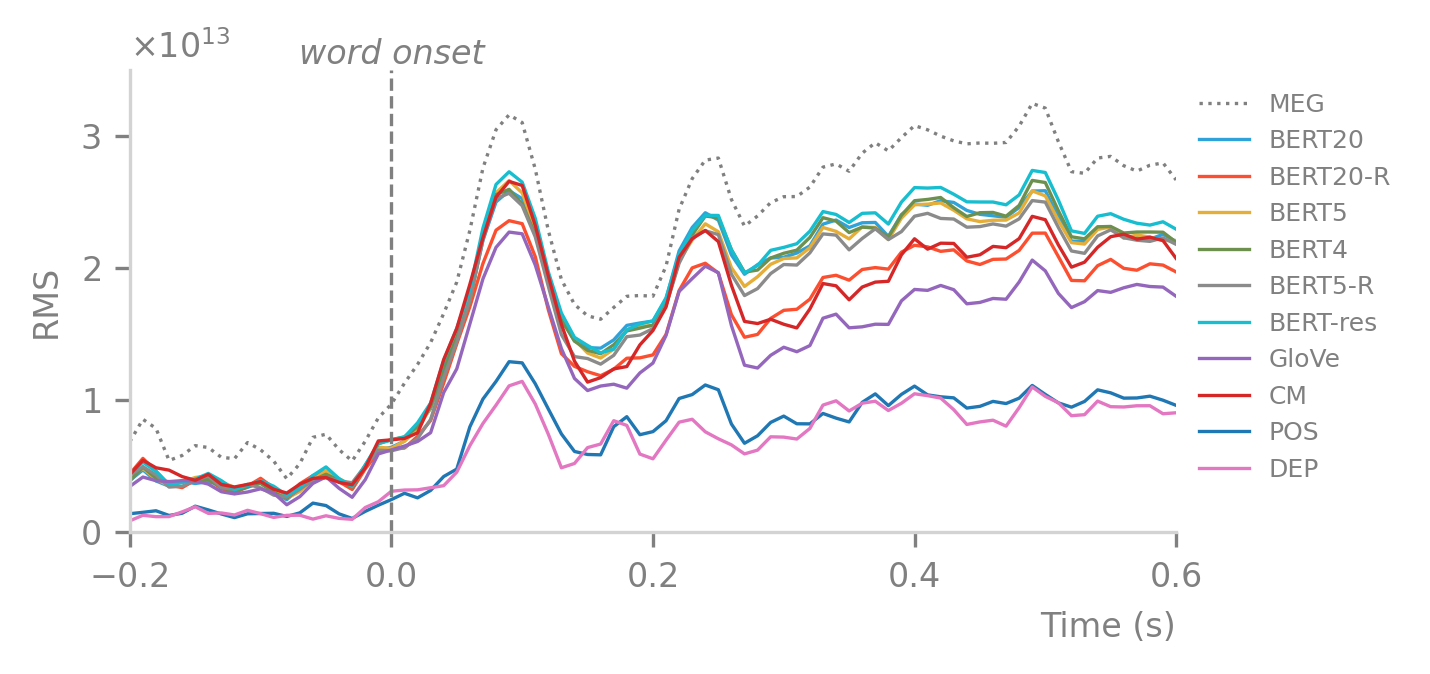

In [140]:
plt.figure(figsize=(4.5, 2))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

plt.ylim(0.0, 3.5*1e13)

t = np.linspace(-0.2, 0.6, ntime)

names = ["MEG", "BERT20", "BERT20-R", "BERT5", "BERT4", "BERT5-R", "BERT-res", "GloVe", "CM", "POS", "DEP"]

for name in names:
    x = rms(all_preds[name].get_data() * 1e15) # coef is from MNE
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=.8, label=name)
    
plt.vlines(0.0, 0.0, 3.5e13, linestyle='--', lw=.8, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=6, labelcolor="gray", edgecolor="none", bbox_to_anchor=(1, 1))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("RMS", size=8, color="gray")
plt.xlabel("Time (s)", size=8, loc="right", color="gray")

plt.text(0.0, 3.55*1e13, "word onset", size=8, color="gray", fontstyle="italic", ha="center")
plt.savefig("../figures/rms-all.pdf")
plt.show()

## BERT RMS

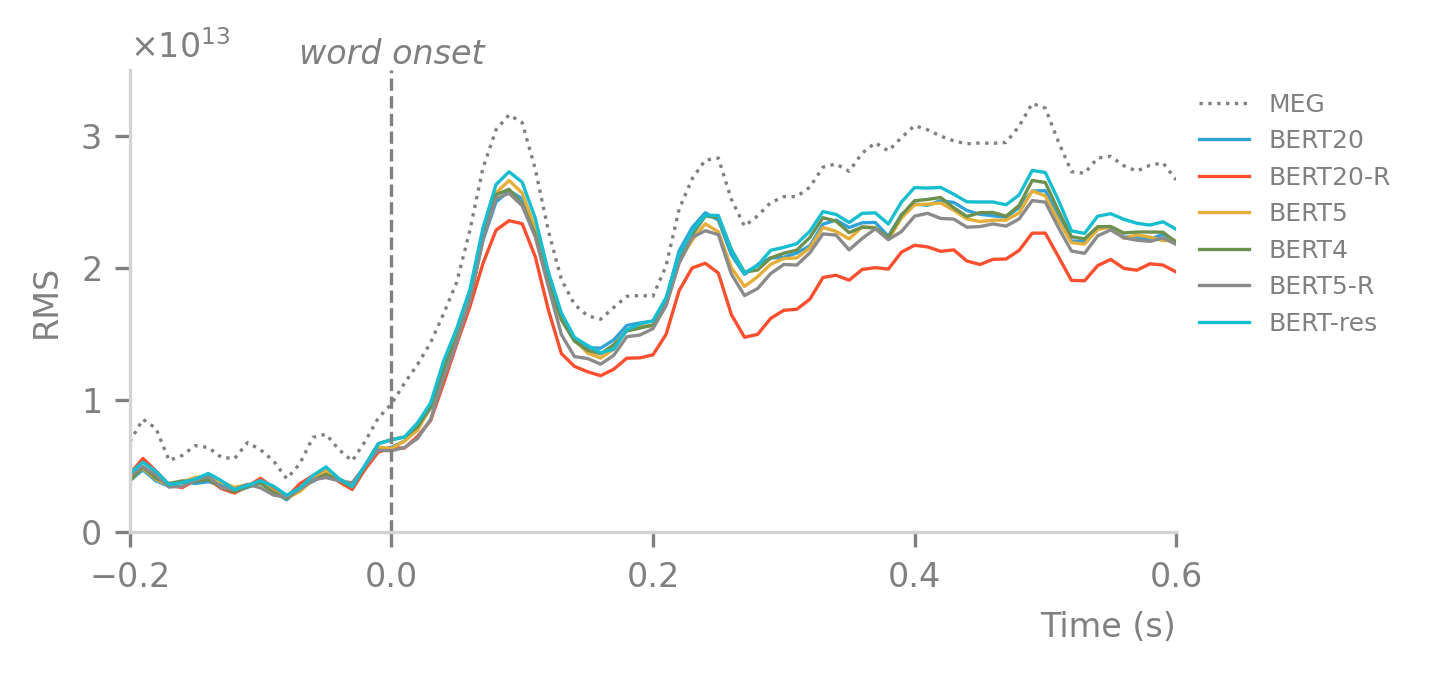

In [143]:
plt.figure(figsize=(4.5, 2))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

plt.ylim(0.0, 3.5*1e13)

t = np.linspace(-0.2, 0.6, ntime)

names = ["MEG", "BERT20", "BERT20-R", "BERT5", "BERT4", "BERT5-R", "BERT-res"]

for name in names:
    x = rms(all_preds[name].get_data() * 1e15) # coef is from MNE
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=.8, label=name)
    
plt.vlines(0.0, 0.0, 3.5e13, linestyle='--', lw=.8, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=6, labelcolor="gray", edgecolor="none", bbox_to_anchor=(1, 1))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("RMS", size=8, color="gray")
plt.xlabel("Time (s)", size=8, loc="right", color="gray")

plt.text(0.0, 3.55*1e13, "word onset", size=8, color="gray", fontstyle="italic", ha="center")
plt.savefig("../figures/rms-bert.pdf")
plt.show()

## $R^2$ plots

In [30]:
bert20_r2 = load_results(
    exp="bert",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert20rh_r2 = load_results(
    exp="bertseq20rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_r2 = load_results(
    exp="bertseq5",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_r2 = load_results(
    exp="bertseq5rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert1_r2 = load_results(
    exp="bertseq1",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert2_r2 = load_results(
    exp="bertseq2",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert3_r2 = load_results(
    exp="bertseq3",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert4_r2 = load_results(
    exp="bertseq4",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)
#

bert5_lag1_r2 = load_results(
    exp="bertseqlag1_5",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_lag2_r2 = load_results(
    exp="bertseqlag5_2_5",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_lag3_r2 = load_results(
    exp="bertseqlag5_3_5",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

#

bert5rh_lag1_r2 = load_results(
    exp="bertseq5_lag1rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_lag2_r2 = load_results(
    exp="bertseq5_lag2rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_lag3_r2 = load_results(
    exp="bertseq5_lag3rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

##

bert5_res1_r2 = load_results(
    exp="bertseqres_5_1",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_res2_r2 = load_results(
    exp="bertseqres_5_2",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_res3_r2 = load_results(
    exp="bertseqres_5_3",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)


bert5rh_res1_r2 = load_results(
    exp="bertseqres_5_1rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_res2_r2 = load_results(
    exp="bertseqres_5_2rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_res3_r2 = load_results(
    exp="bertseqres_5_3rh",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
)

Loading bert, found sub: 8, found files: 8


100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 879.75it/s]


Loading bertseq20rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1537.50it/s]


Loading bertseq5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1638.16it/s]


Loading bertseq5rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1619.97it/s]


Loading bertseq1, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1418.73it/s]


Loading bertseq2, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1673.54it/s]


Loading bertseq3, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1929.19it/s]


Loading bertseq4, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1558.28it/s]


Loading bertseqlag1_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1317.31it/s]


Loading bertseqlag5_2_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1490.51it/s]


Loading bertseqlag5_3_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1528.47it/s]


Loading bertseq5_lag1rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1485.76it/s]


Loading bertseq5_lag2rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1487.21it/s]


Loading bertseq5_lag3rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1567.38it/s]


Loading bertseqres_5_1, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1556.26it/s]


Loading bertseqres_5_2, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1630.91it/s]


Loading bertseqres_5_3, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1583.95it/s]


Loading bertseqres_5_1rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1676.72it/s]


Loading bertseqres_5_2rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1608.94it/s]


Loading bertseqres_5_3rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1657.25it/s]


In [31]:
glove_r2 = load_results(
    exp="glove",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

cm_r2 = load_results(
    exp="cm",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

pos_r2 = load_results(
    exp="postag",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

dep_r2 = load_results(
    exp="deptags",
    kind="r2s",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

Loading glove, found sub: 7, found files: 7


100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 589.06it/s]


Loading cm, found sub: 7, found files: 7


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1598.61it/s]


Loading postag, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1639.20it/s]


Loading deptags, found sub: 6, found files: 6


100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1445.81it/s]


In [33]:
all_r2s = dict(
    zip(
        [
    "BERT20", 
    "BERT5",
    "BERT4",
    "BERT3",
    "BERT2",
    "BERT1",
    "BERT5-R",
    "BERT20-R", 
    "BERT5-lag1",
    "BERT5-lag2",
    "BERT5-lag3",
    "BERT5-lag1-R",
    "BERT5-lag2-R",
    "BERT5-lag3-R",
    "BERT5-res1",
    "BERT5-res2",
    "BERT5-res3",
    "BERT5-res1-R",
    "BERT5-res2-R",
    "BERT5-res3-R",
    "GloVe", 
    "CM",
    "POS",
    "DEP",
],
        [
            bert20_r2,
            bert5_r2,
            bert4_r2,
            bert3_r2,
            bert2_r2,
            bert1_r2, 
            bert5rh_r2,
            bert20rh_r2, 
            bert5_lag1_r2,
            bert5_lag2_r2,
            bert5_lag3_r2,
            bert5rh_lag1_r2,
            bert5rh_lag2_r2,
            bert5rh_lag3_r2,
            bert5_res1_r2,
            bert5_res2_r2,
            bert5_res3_r2,
            bert5rh_res1_r2,
            bert5rh_res2_r2,
            bert5rh_res3_r2,
            glove_r2,
            cm_r2,
            pos_r2,
            dep_r2,
            ]
    )
)

In [48]:
bert20_corr = load_results(
    exp="bert",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert20rh_corr = load_results(
    exp="bertseq20rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_corr = load_results(
    exp="bertseq5",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_corr = load_results(
    exp="bertseq5rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert1_corr = load_results(
    exp="bertseq1",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

#

bert5_lag1_corr = load_results(
    exp="bertseqlag1_5",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_lag2_corr = load_results(
    exp="bertseqlag5_2_5",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_lag3_corr = load_results(
    exp="bertseqlag5_3_5",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

#

bert5rh_lag1_corr = load_results(
    exp="bertseq5_lag1rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_lag2_corr = load_results(
    exp="bertseq5_lag2rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_lag3_corr = load_results(
    exp="bertseq5_lag3rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

##

bert5_res1_corr = load_results(
    exp="bertseqres_5_1",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_res2_corr = load_results(
    exp="bertseqres_5_2",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_res3_corr = load_results(
    exp="bertseqres_5_3",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)


bert5rh_res1_corr = load_results(
    exp="bertseqres_5_1rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_res2_corr = load_results(
    exp="bertseqres_5_2rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_res3_corr = load_results(
    exp="bertseqres_5_3rh",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
)

Loading bert, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3207.27it/s]


Loading bertseq20rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2510.81it/s]


Loading bertseq5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2940.02it/s]


Loading bertseq5rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2931.03it/s]


Loading bertseq1, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2267.19it/s]


Loading bertseqlag1_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2041.52it/s]


Loading bertseqlag5_2_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2731.11it/s]


Loading bertseqlag5_3_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2132.74it/s]


Loading bertseq5_lag1rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2698.17it/s]


Loading bertseq5_lag2rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2381.60it/s]


Loading bertseq5_lag3rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2517.78it/s]


Loading bertseqres_5_1, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2643.33it/s]


Loading bertseqres_5_2, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2648.55it/s]


Loading bertseqres_5_3, found sub: 7, found files: 7


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 2273.86it/s]


Loading bertseqres_5_1rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2716.74it/s]


Loading bertseqres_5_2rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2162.43it/s]


Loading bertseqres_5_3rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2696.22it/s]


In [54]:
glove_corr = load_results(
    exp="glove",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

cm_corr = load_results(
    exp="cm",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

pos_corr = load_results(
    exp="postag",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

dep_corr = load_results(
    exp="deptags",
    kind="corr",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

Loading glove, found sub: 7, found files: 7


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 2753.98it/s]


Loading cm, found sub: 7, found files: 7


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 2819.56it/s]


Loading postag, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2818.75it/s]


Loading deptags, found sub: 6, found files: 6


100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 2627.74it/s]


In [55]:
all_corr = dict(
    zip(
        [
    "BERT20", 
    "BERT5",
    "BERT1",
    "BERT5-R",
    "BERT20-R", 
    "BERT5-lag1",
    "BERT5-lag2",
    "BERT5-lag3",
    "BERT5-lag1-R",
    "BERT5-lag2-R",
    "BERT5-lag3-R",
    "BERT5-res1",
    "BERT5-res2",
    "BERT5-res3",
    "BERT5-res1-R",
    "BERT5-res2-R",
    "BERT5-res3-R",
    "GloVe", 
    "CM",
    "POS",
    "DEP",
],
        [
            bert20_corr,
            bert5_corr, 
            bert1_corr, 
            bert5rh_corr,
            bert20rh_corr, 
            bert5_lag1_corr,
            bert5_lag2_corr,
            bert5_lag3_corr,
            bert5rh_lag1_corr,
            bert5rh_lag2_corr,
            bert5rh_lag3_corr,
            bert5_res1_corr,
            bert5_res2_corr,
            bert5_res3_corr,
            bert5rh_res1_corr,
            bert5rh_res2_corr,
            bert5rh_res3_corr,
            glove_corr,
            cm_corr,
            pos_corr,
            dep_corr,
            ]
    )
)

In [34]:
def average_r2(scores):
    all_scores = list(scores.values())
    evoked = [s.mean(axis=0) for s in all_scores]
    mean, std = np.mean(evoked, axis=0), np.std(evoked, axis=0)
    return mean, std

In [38]:
bert20_sig = load_results(
    exp="bert",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert20rh_sig = load_results(
    exp="bertseq20rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_sig = load_results(
    exp="bertseq5",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_sig = load_results(
    exp="bertseq5rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert1_sig = load_results(
    exp="bertseq1",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert2_sig = load_results(
    exp="bertseq2",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert3_sig = load_results(
    exp="bertseq3",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert4_sig = load_results(
    exp="bertseq4",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

#

bert5_lag1_sig = load_results(
    exp="bertseqlag1_5",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_lag2_sig = load_results(
    exp="bertseqlag5_2_5",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_lag3_sig = load_results(
    exp="bertseqlag5_3_5",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

#

bert5rh_lag1_sig = load_results(
    exp="bertseq5_lag1rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_lag2_sig = load_results(
    exp="bertseq5_lag2rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_lag3_sig = load_results(
    exp="bertseq5_lag3rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

##

bert5_res1_sig = load_results(
    exp="bertseqres_5_1",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_res2_sig = load_results(
    exp="bertseqres_5_2",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5_res3_sig = load_results(
    exp="bertseqres_5_3",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)


bert5rh_res1_sig = load_results(
    exp="bertseqres_5_1rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_res2_sig = load_results(
    exp="bertseqres_5_2rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

bert5rh_res3_sig = load_results(
    exp="bertseqres_5_3rh",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False
)

Loading bert, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2645.41it/s]


Loading bertseq20rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2870.84it/s]


Loading bertseq5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2643.95it/s]


Loading bertseq5rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2711.03it/s]


Loading bertseq1, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3041.55it/s]


Loading bertseq2, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2722.25it/s]


Loading bertseq3, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2646.87it/s]


Loading bertseq4, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2709.94it/s]


Loading bertseqlag1_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2459.10it/s]


Loading bertseqlag5_2_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3121.63it/s]


Loading bertseqlag5_3_5, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3769.31it/s]


Loading bertseq5_lag1rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3654.77it/s]


Loading bertseq5_lag2rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3112.08it/s]


Loading bertseq5_lag3rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3330.80it/s]


Loading bertseqres_5_1, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3460.65it/s]


Loading bertseqres_5_2, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2923.62it/s]


Loading bertseqres_5_3, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3414.51it/s]


Loading bertseqres_5_1rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3568.48it/s]


Loading bertseqres_5_2rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 3071.06it/s]


Loading bertseqres_5_3rh, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2695.57it/s]


In [39]:
glove_sig = load_results(
    exp="glove",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

cm_sig = load_results(
    exp="cm",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

pos_sig = load_results(
    exp="postag",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

dep_sig = load_results(
    exp="deptags",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

Loading glove, found sub: 7, found files: 7


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 2244.83it/s]


Loading cm, found sub: 7, found files: 7


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 2021.91it/s]


Loading postag, found sub: 8, found files: 8


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2384.48it/s]


Loading deptags, found sub: 6, found files: 6


100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 2586.68it/s]


In [41]:
all_sig = dict(
    zip(
        [
    "BERT20", 
    "BERT5",
    "BERT4",
    "BERT3",
    "BERT2",
    "BERT1",
    "BERT5-R",
    "BERT20-R", 
    "BERT5-lag1",
    "BERT5-lag2",
    "BERT5-lag3",
    "BERT5-lag1-R",
    "BERT5-lag2-R",
    "BERT5-lag3-R",
    "BERT5-res1",
    "BERT5-res2",
    "BERT5-res3",
    "BERT5-res1-R",
    "BERT5-res2-R",
    "BERT5-res3-R",
    "GloVe", 
    "CM",
    "POS",
    "DEP",
],
        [
            bert20_sig,
            bert5_sig,
            bert4_sig,
            bert3_sig,
            bert2_sig,
            bert1_sig, 
            bert5rh_sig,
            bert20rh_sig, 
            bert5_lag1_sig,
            bert5_lag2_sig,
            bert5_lag3_sig,
            bert5rh_lag1_sig,
            bert5rh_lag2_sig,
            bert5rh_lag3_sig,
            bert5_res1_sig,
            bert5_res2_sig,
            bert5_res3_sig,
            bert5rh_res1_sig,
            bert5rh_res2_sig,
            bert5rh_res3_sig,
            glove_sig,
            cm_sig,
            pos_sig,
            dep_sig,
            ]
    )
)

In [42]:
import scipy
from scipy.stats import ttest_rel, ttest_1samp
from statsmodels.stats.multitest import fdrcorrection


def r2s_corrected(scores, sig):
    
    all_sub_evoked = []
    for sub in sig.keys():
        
        r2s = scores[sub]
        h0_rejected = sig[sub] <= 0.05
    
        r2s[~h0_rejected] = 0.0  # set all non significative r2 to 0.0
        mean_r2 = np.mean(r2s, axis=0)
        
        all_sub_evoked.append(mean_r2)
        
    return np.array(all_sub_evoked)


def corr_corrected(scores, sig, corr_idx=1):
    
    all_sub_evoked = []
    for sub in scores.keys():
        
        if scores[sub].shape[0] == 2:
            corr = scores[sub][corr_idx, :]
        else:
            corr = scores[sub]
            
        h0_rejected = sig[sub] <= 0.05
        corr[~h0_rejected] = 0.0  # set all non significative pearson r to 0.0

        mean_corr = np.mean(corr, axis=0)
            
        all_sub_evoked.append(mean_corr)
        
    return np.array(all_sub_evoked)

def r2s_stats(scores, sig):
    all_sub_evoked = r2s_corrected(scores, sig)
    return np.mean(all_sub_evoked, axis=0), scipy.stats.sem(all_sub_evoked, axis=0)
    
    
def corr_stats(scores, sig, corr_idx=1):
    all_sub_evoked = corr_corrected(scores, sig, corr_idx=corr_idx)
    return np.mean(all_sub_evoked, axis=0), scipy.stats.sem(all_sub_evoked, axis=0)


def timewise_corrected_ttest_1samp(scores, q=0.05):
    res = ttest_1samp(scores, 0.0, alternative="greater")
    pvalues = res[1]
    corrected_pvalues = fdrcorrection(pvalues, alpha=q)[1]
    return corrected_pvalues

### All $R^2$

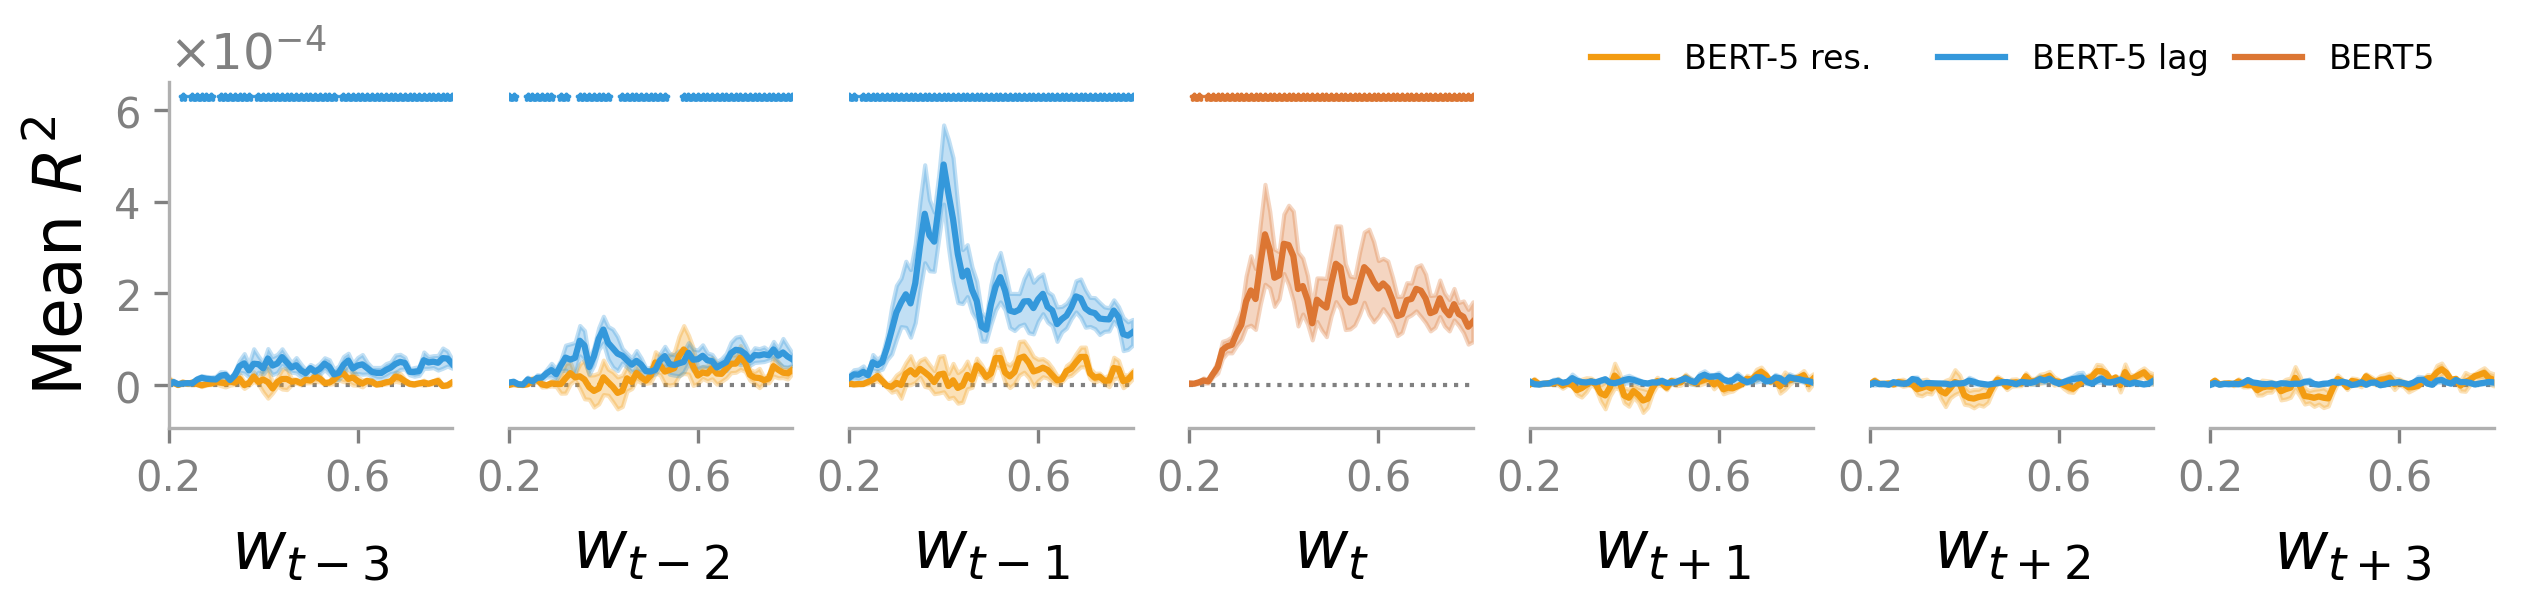

In [80]:
t = np.linspace(0.2, 0.8, ntime-20)

groups = {
    "$w_{t-3}$": ["BERT5-res3", "BERT5-lag3"],
    "$w_{t-2}$": ["BERT5-res2", "BERT5-lag2"],
    "$w_{t-1}$": ["BERT5-res1", "BERT5-lag1"],
    "$w_{t}$": ["BERT5", ],
    "$w_{t+1}$": ["BERT5-res1-R", "BERT5-lag1-R"],
    "$w_{t+2}$": ["BERT5-res2-R", "BERT5-lag2-R"],
    "$w_{t+3}$": ["BERT5-res3-R", "BERT5-lag3-R"],
}

s_colors = {
    "BERT20": "#7D3C98",
    "BERT5": "#DC7633",
    "BERT4": "#3498DB",
    "BERT3": "#AE2727",
    "BERT2": "#DE00F8",
    "BERT1": "#27AE60",
}

# lag_colors = {
#     "BERT5-res3": "#E74C3C",
#     "BERT5-res2": "#27AE60", 
#     "BERT5-res1": "#F1C40F",
#     "BERT5-res3-R": "#E74C3C",
#     "BERT5-res2-R": "#27AE60", 
#     "BERT5-res1-R": "#F1C40F",
#     "BERT5-lag3": "#2980B9",
#     "BERT5-lag2": "#9B59B6",
#     "BERT5-lag1": "#D35400",
#     "BERT5-lag3-R": "#2980B9",
#     "BERT5-lag2-R": "#9B59B6",
#     "BERT5-lag1-R": "#D35400",
# }

fig, axs = plt.subplots(1, len(groups), figsize=(10, 1.5), sharey=True)

sem_scale = 1
max_value = 0
min_value = 0
for i, (lag, features) in enumerate(groups.items()):
    for name in features:
        scores = all_r2s[name]
        pvalues = all_sig[name]
        mean, sem = r2s_stats(scores, pvalues)
        
        if "res" in name:
            color = "#F39C12"
            label = "BERT-5 res."
        elif "lag" in name:
            color = "#3498DB"
            label = "BERT-5 lag"
        else:
            color = s_colors[name]
            label = name
            
        axs[i].plot(t, mean[20:], color=color, lw=1.5, label=label)
        axs[i].fill_between(t, mean[20:]-sem[20:]*sem_scale, mean[20:]+sem[20:]*sem_scale, alpha=0.3, color=color)

        if max(mean+sem*sem_scale) > max_value:
            max_value = max(mean+sem*sem_scale)

        if min(mean-sem*sem_scale) < min_value:
            min_value = min(mean-sem*sem_scale)
            
    axs[i].set_xlabel(lag)
    
    if i == 0:
        axs[i].legend(fontsize=8, edgecolor="none", bbox_to_anchor=(7.3, 1.2), ncols=2)
        axs[i].set_ylabel("Mean $R^2$")
    if i == 3:
        axs[i].legend(fontsize=8, edgecolor="none", bbox_to_anchor=(4.5, 1.2), ncols=6)

for i, (lag, features) in enumerate(groups.items()):
    idx = max_value + 0.00006
    for name in features:
        scores = all_r2s[name]
        pvalues = all_sig[name]

        r2s_scores = r2s_corrected(scores, pvalues)
        pvalues = timewise_corrected_ttest_1samp(r2s_scores)

        onestar = np.zeros(ntime)
        onestar[20:] = (pvalues[20:] < 0.05) * idx
        
        if "res" in name:
            color = "#F39C12"
        elif "lag" in name:
            color = "#3498DB"
        else:
            color = s_colors[name]

        onesig = False
        for j in range(ntime-20):
            if onestar[j+20] > 0:
                axs[i].scatter(t[j], onestar[j+20], marker="*", s=2, color=color)
                onesig = True

        if onesig:
            idx += 0.00003
            onesig = False

    #axs[i].vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
    axs[i].axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)
    
    axs[i].tick_params(
            axis='both',
            which='both',            
            labelsize=10,
            labelcolor="gray",
            color="gray"
        )

    axs[i].spines[["right", "top"]].set_visible(False)
    if i != 0:
        axs[i].spines[["left"]].set_visible(False)
        axs[i].tick_params(
            axis='y',
            which='both',            
            left=False,         
            labelleft=False)
    
    axs[i].set_xticks([0.2, 0.6])

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

# plt.xticks(plt.xticks()[0][::2])

# plt.ylabel("Mean significative $R^2$", size=8, color="gray")
# plt.xlabel("Time (s)", size=8, loc="right", color="gray")

# #plt.text(0.2, max_value, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

plt.savefig("../figures/r2_bert_lag_res.png", bbox_inches="tight")
plt.savefig("../figures/r2_bert_lag_res.pdf", bbox_inches="tight")
plt.show()

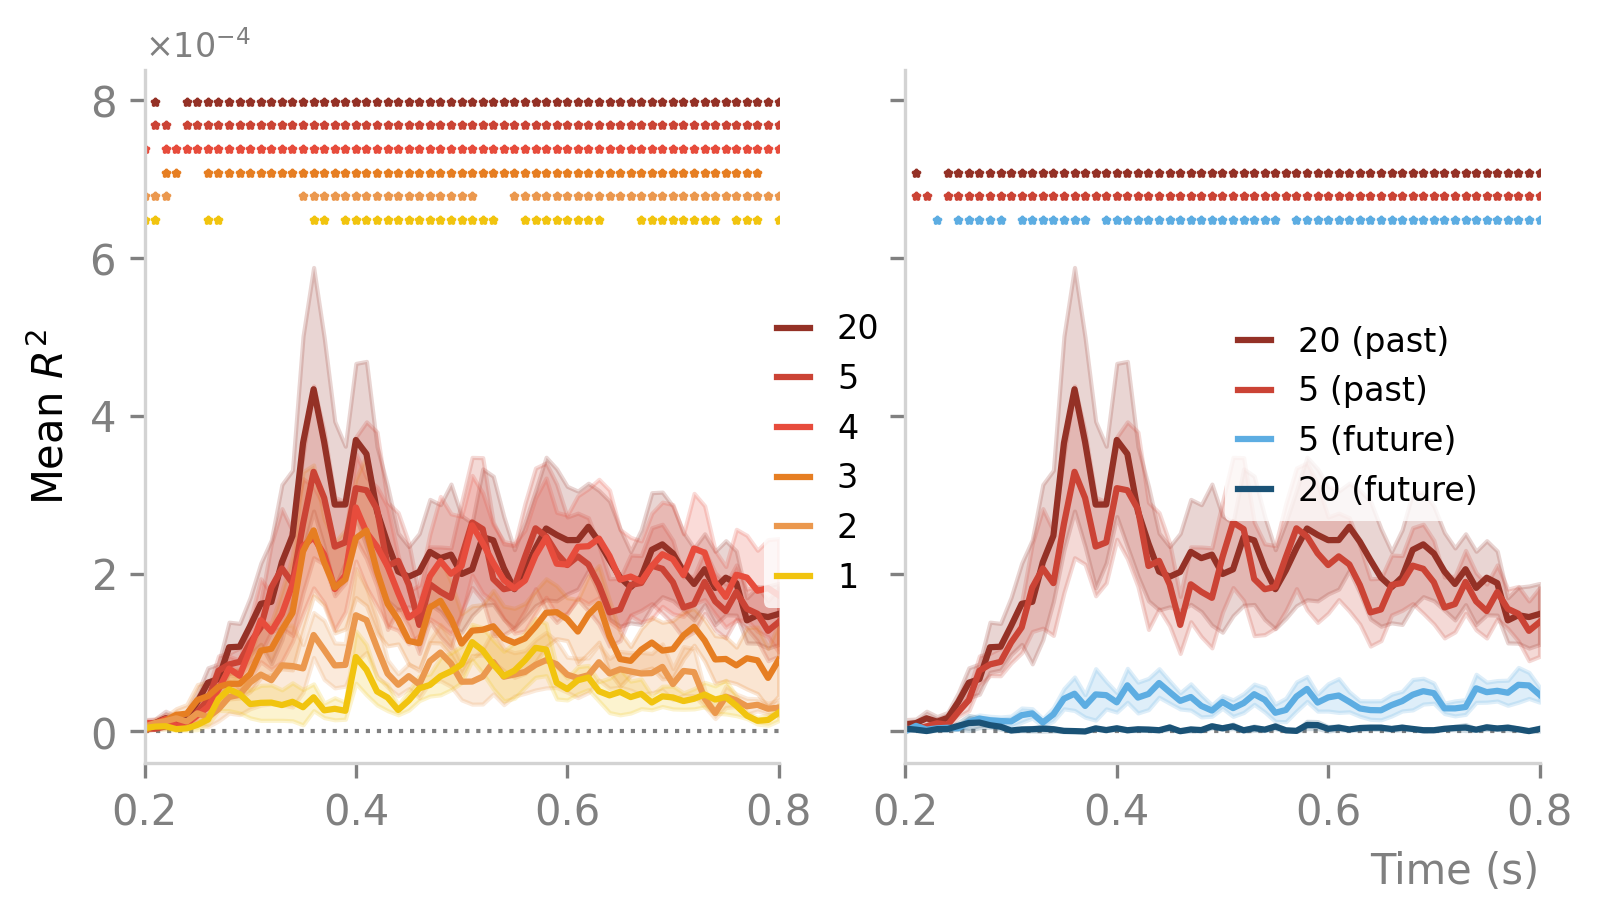

In [139]:
t = np.linspace(0.2, 0.8, ntime-20)

features = ["BERT20", "BERT5", "BERT4", "BERT3", "BERT2", "BERT1"]

s_colors = {
    "BERT20": "#943126",
    "BERT5": "#CB4335",
    "BERT4": "#E74C3C",
    "BERT3": "#E67E22",
    "BERT2": "#EB984E",
    "BERT1": "#F1C40F",
}

labels = {
    "BERT20": "20",
    "BERT5": "5",
    "BERT4": "4",
    "BERT3": "3",
    "BERT2": "2",
    "BERT1": "1",
}


fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

axs = axes[0]

sem_scale = 1
max_value = 0
min_value = 0

for name in features:
    scores = all_r2s[name]
    pvalues = all_sig[name]
    mean, sem = r2s_stats(scores, pvalues)

    if "res" in name:
        color = "#F39C12"
        label = "BERT-5 res."
    elif "lag" in name:
        color = "#3498DB"
        label = "BERT-5 lag"
    else:
        color = s_colors[name]
        label = labels[name]

    axs.plot(t, mean[20:], color=color, lw=1.5, label=label)
    axs.fill_between(t, mean[20:]-sem[20:]*sem_scale, mean[20:]+sem[20:]*sem_scale, alpha=0.2, color=color)

    if max(mean+sem*sem_scale) > max_value:
        max_value = max(mean+sem*sem_scale)

    if min(mean-sem*sem_scale) < min_value:
        min_value = min(mean-sem*sem_scale)

axs.legend(fontsize=8, edgecolor="none", handlelength=1, bbox_to_anchor=(0.95, 0.2), ncols=1)

idx = max_value + 0.00006
for name in reversed(features):
    scores = all_r2s[name]
    pvalues = all_sig[name]

    r2s_scores = r2s_corrected(scores, pvalues)
    pvalues = timewise_corrected_ttest_1samp(r2s_scores)

    onestar = np.zeros(ntime)
    onestar[20:] = (pvalues[20:] < 0.05) * idx

    if "res" in name:
        color = "#F39C12"
    elif "lag" in name:
        color = "#3498DB"
    else:
        color = s_colors[name]

    onesig = False
    for j in range(ntime-20):
        if onestar[j+20] > 0:
            axs.scatter(t[j], onestar[j+20], marker="*", s=2, color=color)
            onesig = True

    if onesig:
        idx += 0.00003
        onesig = False

#axs.vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
axs.axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)

axs.tick_params(
        axis='both',
        which='both',            
        labelsize=10,
        labelcolor="gray",
        color="gray"
    )

axs.spines[["right", "top"]].set_visible(False)

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
axs.yaxis.set_major_formatter(mf)
axs.yaxis.get_offset_text().set_size(8)

axs.set_ylabel("Mean $R^2$", size=10)

############
features = ["BERT20", "BERT5", "BERT5-R", "BERT20-R",]

s_colors = {
    "BERT20": "#943126",
    "BERT20-R": "#1A5276",
    "BERT5": "#CB4335",
    "BERT5-R": "#5DADE2",
}

labels = {
    "BERT20": "20 (past)",
    "BERT20-R": "20 (future)",
    "BERT5": "5 (past)",
    "BERT5-R": "5 (future)",
}

axs = axes[1]

sem_scale = 1
max_value = 0
min_value = 0

for name in features:
    scores = all_r2s[name]
    pvalues = all_sig[name]
    mean, sem = r2s_stats(scores, pvalues)

    if "res" in name:
        color = "#F39C12"
        label = "BERT-5 res."
    elif "lag" in name:
        color = "#3498DB"
        label = "BERT-5 lag"
    else:
        color = s_colors[name]
        label = labels[name]

    axs.plot(t, mean[20:], color=color, lw=1.5, label=label)
    axs.fill_between(t, mean[20:]-sem[20:]*sem_scale, mean[20:]+sem[20:]*sem_scale, alpha=0.2, color=color)

    if max(mean+sem*sem_scale) > max_value:
        max_value = max(mean+sem*sem_scale)

    if min(mean-sem*sem_scale) < min_value:
        min_value = min(mean-sem*sem_scale)

axs.legend(fontsize=8, edgecolor="none", handlelength=1, bbox_to_anchor=(0.95, 0.5), ncols=1)

idx = max_value + 0.00006
for name in reversed(features):
    scores = all_r2s[name]
    pvalues = all_sig[name]

    r2s_scores = r2s_corrected(scores, pvalues)
    pvalues = timewise_corrected_ttest_1samp(r2s_scores)

    onestar = np.zeros(ntime)
    onestar[20:] = (pvalues[20:] < 0.05) * idx

    if "res" in name:
        color = "#F39C12"
    elif "lag" in name:
        color = "#3498DB"
    else:
        color = s_colors[name]

    onesig = False
    for j in range(ntime-20):
        if onestar[j+20] > 0:
            axs.scatter(t[j], onestar[j+20], marker="*", s=2, color=color)
            onesig = True

    if onesig:
        idx += 0.00003
        onesig = False

#axs.vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
axs.axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)
axs.set_xlabel("Time (s)", size=10, loc="right", color="gray")

axs.tick_params(
        axis='both',
        which='both',            
        labelsize=10,
        labelcolor="gray",
        color="gray"
    )

axs.spines[["right", "top"]].set_visible(False)


fig.savefig("../figures/r2_context_size.pdf", bbox_inches="tight")

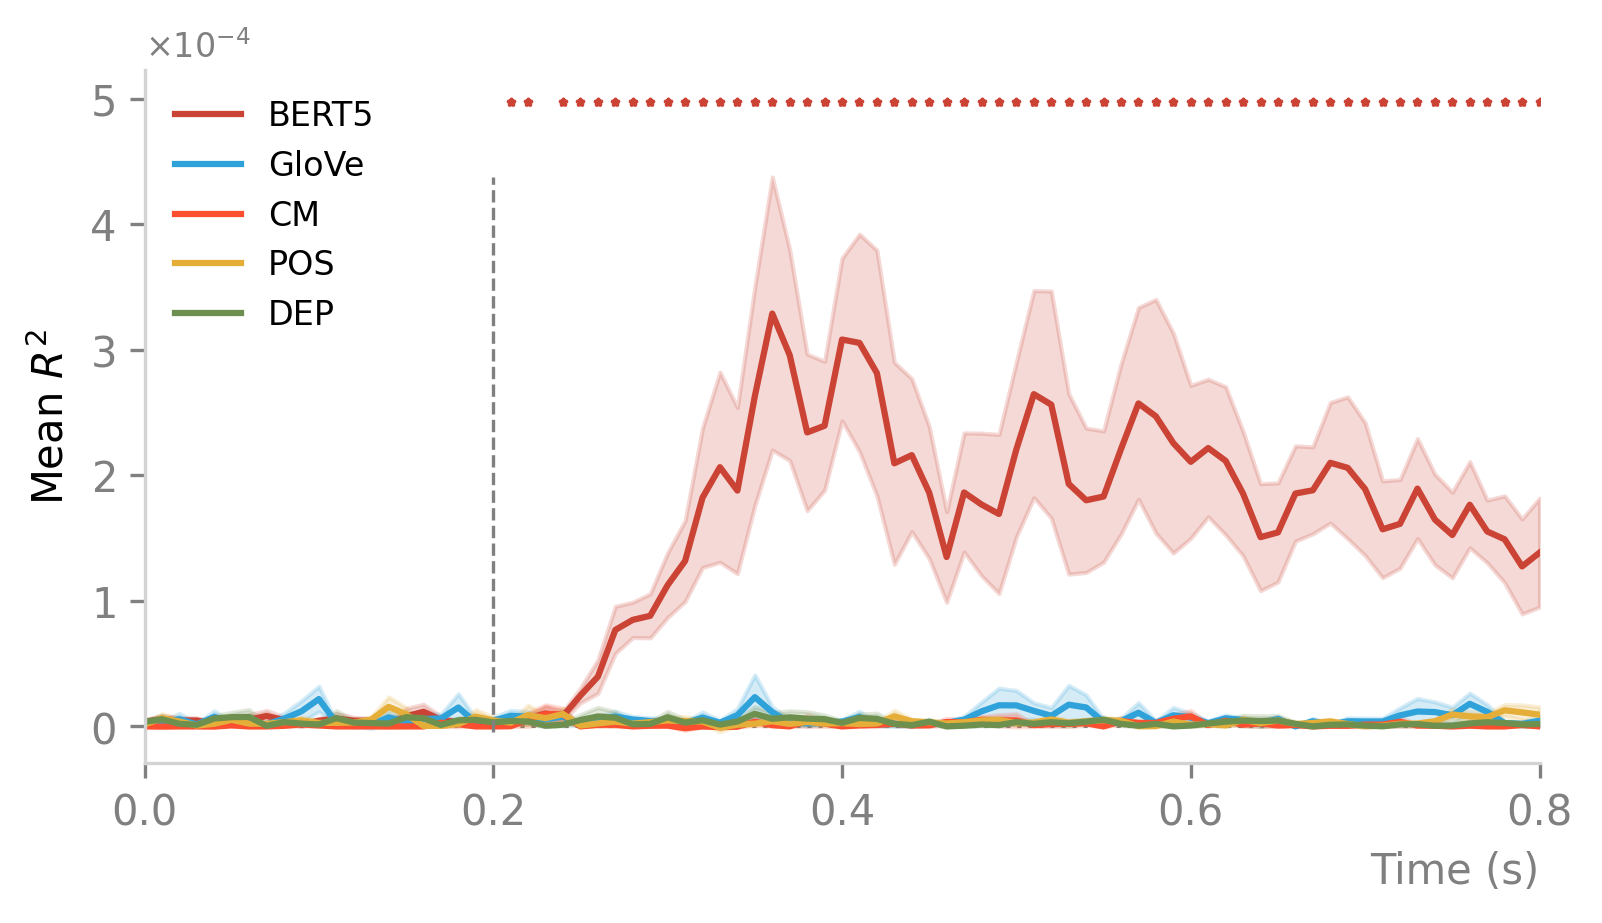

In [142]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3))
# plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
# plt.tick_params(which="both", colors='gray', labelsize=8)

t = np.linspace(0.0, 0.8, ntime)

axs.tick_params(
        axis='both',
        which='both',            
        labelsize=10,
        labelcolor="gray",
        color="gray"
    )


names = ["BERT5", "GloVe", "CM", "POS", "DEP"]

colors["BERT5"] = "#CB4335"

sem_scale = 1
max_value = 0
min_value = 0
for name in names:
    scores = all_r2s[name]
    pvalues = all_sig[name]
    mean, sem = r2s_stats(scores, pvalues)
    color = colors[name]
    plt.plot(t, mean, color=color, lw=1.5, label=name)
    plt.fill_between(t, mean-sem*sem_scale, mean+sem*sem_scale, alpha=0.2, color=color)
    
    if max(mean+sem*sem_scale) > max_value:
        max_value = max(mean+sem*sem_scale)
        
    if min(mean-sem*sem_scale) < min_value:
        min_value = min(mean-sem*sem_scale)

idx = max_value + 0.00006
for name in names:
    scores = all_r2s[name]
    pvalues = all_sig[name]
    
    r2s_scores = r2s_corrected(scores, pvalues)
    pvalues = timewise_corrected_ttest_1samp(r2s_scores)
    
    onestar = np.zeros(ntime)
    onestar[20:] = (pvalues[20:] < 0.05) * idx
    
    onesig = False
    for i in range(ntime):
        if onestar[i] > 0:
            plt.scatter(t[i], onestar[i], marker="*", s=2, color=colors[name])
            onesig = True
            
    if onesig:
        idx += 0.00003
        onesig = False

plt.vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
plt.axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)

axs.spines[["right", "top"]].set_visible(False)
axs.legend(fontsize=8, edgecolor="none")

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Mean $R^2$", size=10)
plt.xlabel("Time (s)", size=10, loc="right", color="gray")

#plt.text(0.2, max_value, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

plt.savefig("../figures/r2s_all.png", bbox_inches="tight")
plt.savefig("../figures/r2s_all.pdf", bbox_inches="tight")
plt.show()

### All correlation

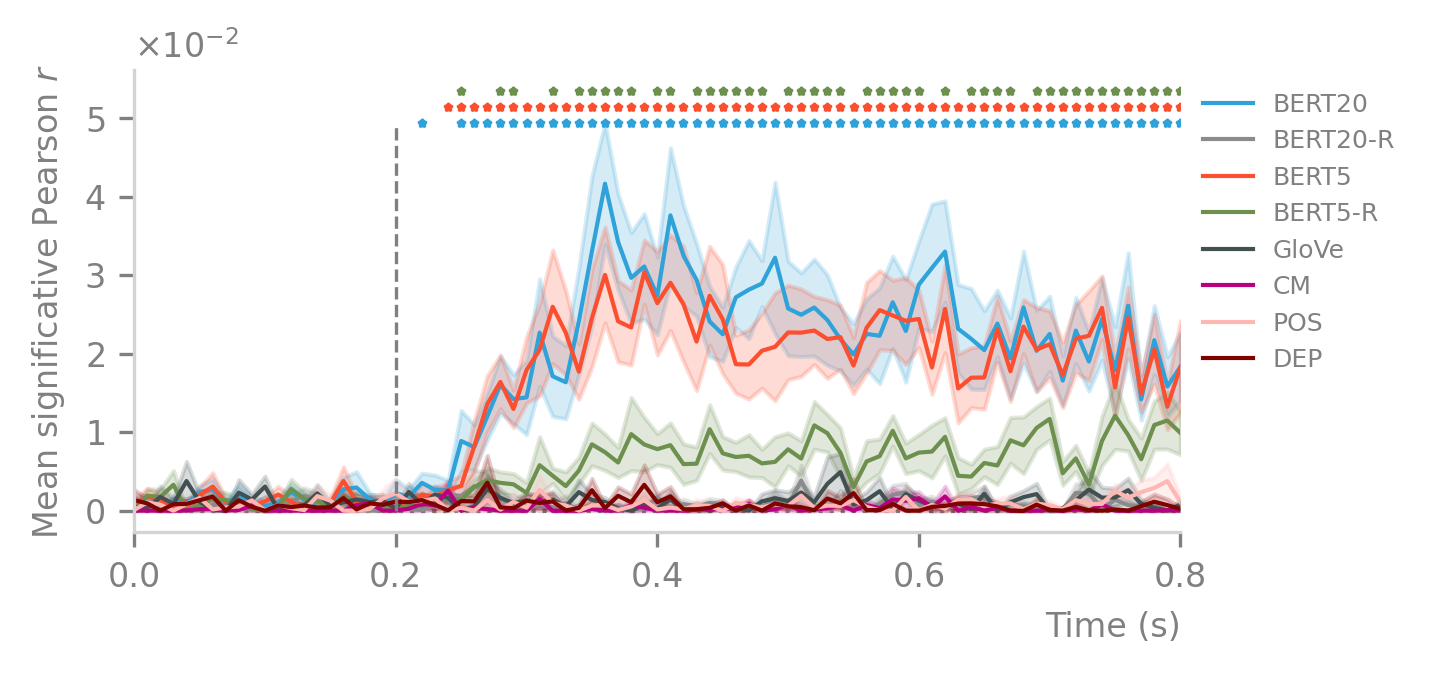

In [146]:
plt.figure(figsize=(4.5, 2))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

t = np.linspace(0.0, 0.8, ntime)

names = ["BERT20", "BERT20-R", "BERT5", "BERT5-R", "GloVe", "CM", "POS", "DEP"]

sem_scale = 1
max_value = 0
min_value = 0
for name in names:
    scores = all_corr[name]
    pvalues = all_sig[name]
    mean, sem = corr_stats(scores, pvalues)
    color = colors[name]
    plt.plot(t, mean, color=color, lw=1, label=name)
    plt.fill_between(t, mean-sem*sem_scale, mean+sem*sem_scale, alpha=0.2, color=color)
    
    if max(mean+sem*sem_scale) > max_value:
        max_value = max(mean+sem*sem_scale)
        
    if min(mean-sem*sem_scale) < min_value:
        min_value = min(mean-sem*sem_scale)

idx = max_value + 0.00006
for name in names:
    scores = all_corr[name]
    pvalues = all_sig[name]
    
    corr_scores = corr_corrected(scores, pvalues, corr_idx=0)
    pvalues = timewise_corrected_ttest_1samp(corr_scores)
    
    onestar = np.zeros(ntime)
    onestar[20:] = (pvalues[20:] < 0.05) * idx
    
    onesig = False
    for i in range(ntime):
        if onestar[i] > 0:
            plt.scatter(t[i], onestar[i], marker="*", s=2, color=colors[name])
            onesig = True
            
    if onesig:
        idx += 0.002
        onesig = False

plt.vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
plt.axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=6, labelcolor="gray", edgecolor="none", bbox_to_anchor=(1, 1))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Mean significative Pearson $r$", size=8, color="gray")
plt.xlabel("Time (s)", size=8, loc="right", color="gray")

#plt.text(0.2, max_value, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

plt.savefig("../figures/corr_all.png", bbox_inches="tight")
plt.savefig("../figures/corr_all.pdf", bbox_inches="tight")
plt.show()

In [226]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection

def r2s_sub(scores, sig):

    means, stds = [], []

    #all_r2s = list(bert20_r2.values())
    all_sub_evoked = []
    for sub, pvalues in sig.items():
        r2s = scores[sub]
        sig = pvalues < 0.05
        all_evoked = []
        for i in range(81):
            evoked = np.zeros(208)
            sig_r2s = r2s[:, i][sig[:, i]]
            evoked[sig[:, i]] = sig_r2s
            evoked = np.mean(evoked)    
            all_evoked.append(evoked)
        all_sub_evoked.append(all_evoked)

    return np.array(all_sub_evoked)

r2s_mean_bert20 = r2s_sub(bert20_r2, bert20_sig)
r2s_mean_bertres = r2s_sub(bertres_r2, bertres_sig)
r2s_mean_pos = r2s_sub(pos_r2, pos_sig)

test_res = ttest_rel(r2s_mean_bert20, r2s_mean_bertres, alternative="greater")
test_pos_res = ttest_rel(r2s_mean_bert20, r2s_mean_pos, alternative="greater")

In [227]:
tt_test_corr = fdrcorrection(test_res[1], alpha=0.05)
tt_test_corr_pos = fdrcorrection(test_pos_res[1], alpha=0.05)

In [215]:
test_res[1] < 0.05

array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [228]:
tt_test_corr_pos

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([0.11867322, 0.43404239, 0.92816556, 0.11642795, 0.15234396,
        0.45222384, 0.12931454, 0.27826548, 0.51920032, 0.71551751,
        0.72649275, 0.72649275, 0.3460299 , 0.69583567, 0.8993771 ,
        0.5970946 , 0.07322011, 0.12316798, 0.10430114, 0.8993771 ,
        0.3147117 , 0.13067673, 0.3177932 , 0.27105311, 0.2984869 ,
        0.01656654,

# POS

In [7]:
#Extract all the Noun and Verb Tags
stories = np.load('../reports/pos_tags_all.npy', allow_pickle=True)
postags = np.load('../reports/pos_tags_mappings_all.npy', allow_pickle=True)
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

nouns_indices = []
verb_indices = []
cc_indices = []
adv_indices = []
adj_indices = []
for i in np.arange(stories.shape[0]):
    if get_keys_from_value(postags.item(), np.argmax(stories[i]))[0] in ['NN','NNP', 'NNS']:
        nouns_indices.append(i)
    if get_keys_from_value(postags.item(), np.argmax(stories[i]))[0] in ['VBD','VB', 'VBN', 'VBZ', 'VBG', 'VBP']:
        verb_indices.append(i)
    if get_keys_from_value(postags.item(), np.argmax(stories[i]))[0] in ['CC', 'IN']:
        cc_indices.append(i)
    if get_keys_from_value(postags.item(), np.argmax(stories[i]))[0] in ['JJ', 'JJR', 'JJS']:
        adj_indices.append(i)
    if get_keys_from_value(postags.item(), np.argmax(stories[i]))[0] in ['RBR', 'RBS', 'RB', 'WRB']:
        adv_indices.append(i)

In [21]:
pos_preds = load_results(
    exp="postag",
    kind="pred",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False,
    reshape=False
)

pos_sig = load_results(
    exp="postag",
    kind="sig_group_corrected",
    info=info,
    nchan=nchan, 
    ntime=ntime, 
    concat=False)

gt = load_test(
    exp="postag",
    info=info,
    nchan=nchan,
    ntime=ntime,
    reshape=False)

100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1266.73it/s]


In [52]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from tqdm import tqdm
from collections import defaultdict

pos_r2s = defaultdict(dict)
pos_corr = defaultdict(dict)

pos_indices = {
    "nn": nouns_indices,
    "vb": verb_indices,
    "cc": cc_indices,
    "adv": adv_indices,
    "jj": adj_indices
}

for sub, preds in tqdm(pos_preds.items()):
    for pos, idx in pos_indices.items():
        y_pred = preds[idx]
        y_test = gt[idx]
        
        pos_r2s[pos][sub] = r2_score(y_test, y_pred, multioutput="raw_values").reshape(nchan, ntime)
        
        corr = np.zeros((2, nchan*ntime))
        for i in range(nchan*ntime):
            corr[:, i] = pearsonr(y_pred[:, i], y_test[:, i])
        pos_corr[pos][sub] = corr.reshape(2, nchan, ntime)

100%|█████████████████████████████████████████████| 8/8 [00:44<00:00,  5.50s/it]


Text(1, 0, 'Time (s)')

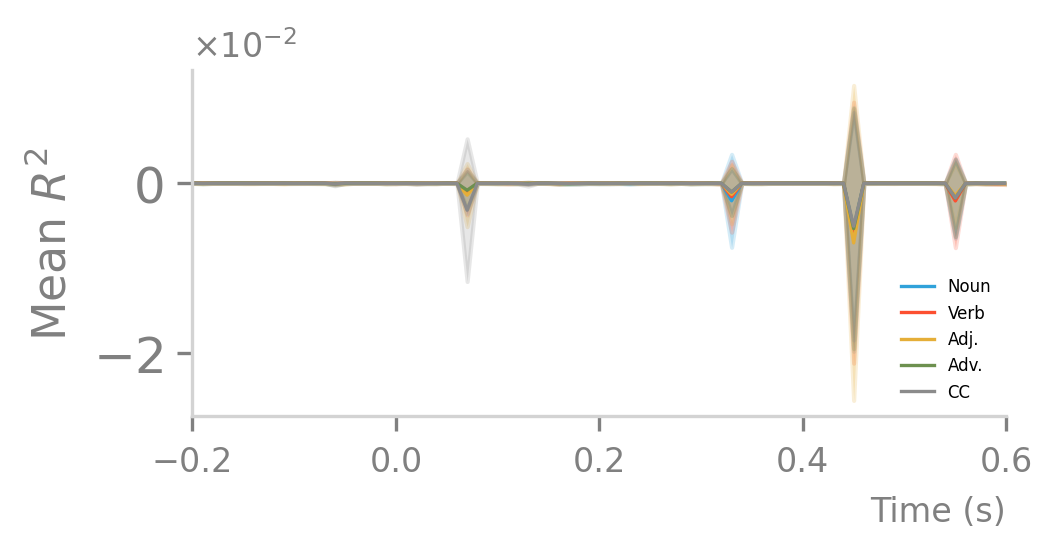

In [75]:
import matplotlib

plt.figure(figsize=(3.5, 1.5))
plt.rcParams.update({'font.size': 10, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray')
#plt.ylim(0.0, 3.5*1e13)
t = np.linspace(-0.2, 0.6, ntime)
names = ["Noun", "Verb", "Adj.", "Adv.", "CC"]
#colors = ["gray", "#CB4335", "#F5B7B1", "#76D7C4", "#F8C471"]
all_features = [
    (pos_r2s["nn"], pos_sig), 
    (pos_r2s["vb"], pos_sig),
    (pos_r2s["jj"], pos_sig),
    (pos_r2s["adv"], pos_sig),
    (pos_r2s["cc"], pos_sig)
]
for i, (scores, pvalues) in enumerate(all_features):
    mean, std = r2s_stats(scores, pvalues)
    color = cc.glasbey_hv[i] if names[i] != "MEG" else "gray"
    style = None if names[i] != "MEG" else ":"
    plt.plot(t, mean, color=color, linestyle=style, lw=.8, label=names[i])
    plt.fill_between(t, mean-std, mean+std, alpha=0.2, color=color)
    idx = 80
    #plt.text(idx/100 - 0.2, x[idx], names[i], color=color, size=8)
    
#plt.vlines(0.0, 0.0, 3.5e13, linestyle='--', lw=.8, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=4, edgecolor="none", loc="lower right")

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::1], size=8)
#plt.yticks(plt.yticks()[0], size=8)

plt.ylabel("Mean $R^2$", size=11, color="gray")
plt.xlabel("Time (s)", size=8, loc="right", color="gray")

# plt.savefig("../figures/rms-bertres-vs-bert20-5-4")
# plt.savefig("../figures/rms-bertres-vs-bert20-5-4.pdf")
#plt.text(0.0, 3.55*1e13, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

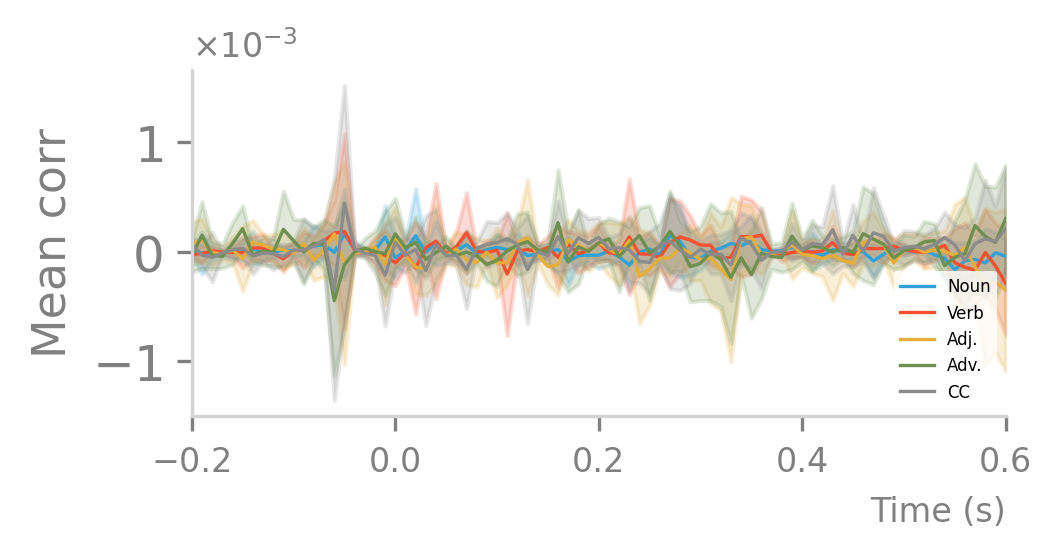

In [62]:
import matplotlib

plt.figure(figsize=(3.5, 1.5))
plt.rcParams.update({'font.size': 10, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray')
#plt.ylim(0.0, 3.5*1e13)
t = np.linspace(-0.2, 0.6, ntime)
names = ["Noun", "Verb", "Adj.", "Adv.", "CC"]
#colors = ["gray", "#CB4335", "#F5B7B1", "#76D7C4", "#F8C471"]
all_features = [
    (pos_corr["nn"], pos_sig), 
    (pos_corr["vb"], pos_sig),
    (pos_corr["jj"], pos_sig),
    (pos_corr["adv"], pos_sig),
    (pos_corr["cc"], pos_sig)
]
for i, (scores, pvalues) in enumerate(all_features):
    mean, std = corr_stats(scores, pvalues, corr_idx=0) # coef is from MNE
    color = cc.glasbey_hv[i] if names[i] != "MEG" else "gray"
    style = None if names[i] != "MEG" else ":"
    plt.plot(t, mean, color=color, linestyle=style, lw=.8, label=names[i])
    plt.fill_between(t, mean-std, mean+std, alpha=0.2, color=color)
    idx = 80
    #plt.text(idx/100 - 0.2, x[idx], names[i], color=color, size=8)
    
#plt.vlines(0.0, 0.0, 3.5e13, linestyle='--', lw=.8, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=4, edgecolor="none", loc="lower right")

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::1], size=8)
#plt.yticks(plt.yticks()[0], size=8)

plt.ylabel("Mean corr", size=11, color="gray")
plt.xlabel("Time (s)", size=8, loc="right", color="gray")

plt.savefig("../figures/rms-bertres-vs-bert20-5-4")
plt.savefig("../figures/rms-bertres-vs-bert20-5-4.pdf")
#plt.text(0.0, 3.55*1e13, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

In [13]:
import os.path as op
from mne.datasets import sample
import mne

data_path = '../../mne_data/MNE-sample-data/'
sample_dir = op.join(data_path, 'MEG', 'sample')
subjects_dir = op.join(data_path, 'subjects')
evoked = mne.read_evokeds(op.join(sample_dir, 'sample_audvis-ave.fif'))[0]
trans = mne.read_trans(op.join(sample_dir, 'sample_audvis_raw-trans.fif'))
mne.viz.plot_alignment(evoked.info, trans, subject='sample', subjects_dir=subjects_dir, surfaces=['seghead'])  # works
#mne.viz.Brain('sample', 'lh', 'seghead', subjects_dir=subjects_dir) 

Reading /home/subbainria/Documents/meg_listening/../../mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.

/home/subbainria/anaconda3/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:41: PyVistaDeprecationWarning: `ipyvtklink` backend is deprecated and has been replaced by the `trame` backend.
  warnings.warn(


In [204]:
nc_1 = np.load("predictions_results_meg/subject_1_kernel_ridge.npy")
Wav2Vec_corrs = []
for i in np.arange(12):
    corr_1 = np.load("./meg_sub1_predictions/"+str(i)+"_corr.npy")[:, 0]
    layer_1 = corr_1 / nc_1
    layer_1[layer_1 > 1.0] = 1.0
    layer_1[layer_1 < -1.0] = -1.0
    layer_1[nc_1 <= 0.01] = 0.0
    layer_1[layer_1<0.0] = 0.0
    Wav2Vec_corrs.append(layer_1)

Hubert_corrs = []
for i in np.arange(1,12):
    corr_1 = np.load("./meg_sub1_predictions/hubert/"+str(i)+"_corr.npy")[:, 0]
    layer_1 = corr_1 / nc_1
    layer_1[layer_1 > 1.0] = 1.0
    layer_1[layer_1 < -1.0] = -1.0
    layer_1[nc_1 <= 0.01] = 0.0
    layer_1[layer_1<0.0] = 0.0
    Hubert_corrs.append(layer_1)
    
fbank_corrs = []
for i in np.arange(1):
    corr_1 = np.load("./"+str(i)+"_corr.npy")[:, 0]
    layer_1 = corr_1 / nc_1
    layer_1[layer_1 > 1.0] = 1.0
    layer_1[layer_1 < -1.0] = -1.0
    layer_1[nc_1 <= 0.01] = 0.0
    layer_1[layer_1<0.0] = 0.0
    fbank_corrs.append(layer_1)

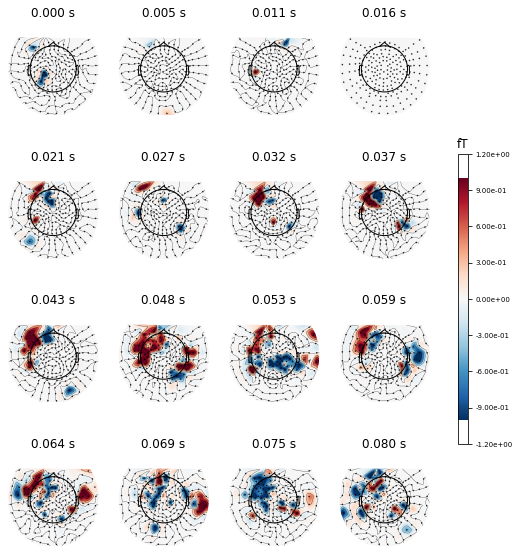

In [155]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(layer_2.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
        ncols=4,
        vlim=(min(layer_2), max(layer_2)),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("hubert_layer3_sub1.pdf")

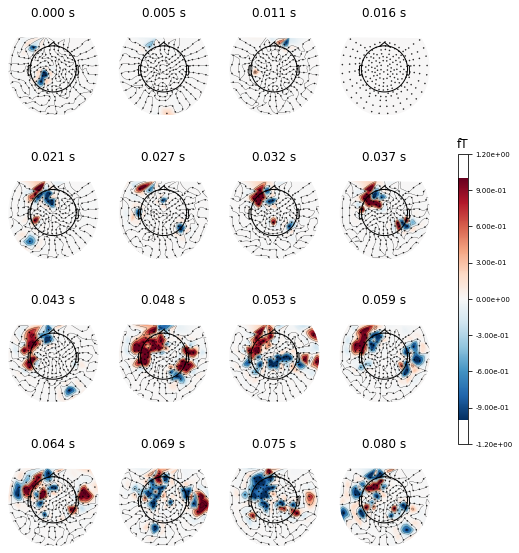

In [156]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(layer_3.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
        ncols=4,
        vlim=(min(layer_3), max(layer_3)),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("hubert_layer4_sub1.pdf")

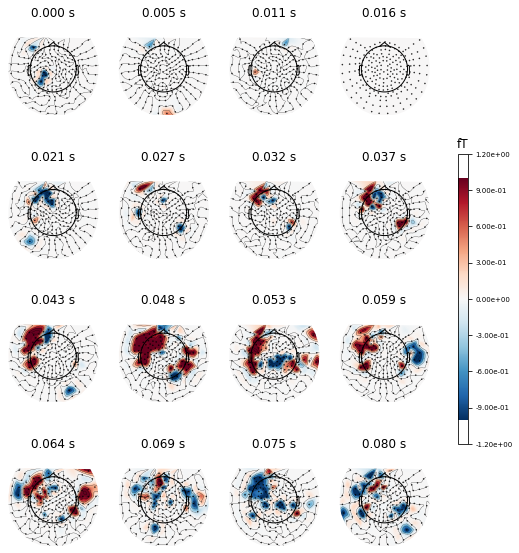

In [157]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(layer_4.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
        ncols=4,
        vlim=(min(layer_4), max(layer_4)),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("hubert_layer12_sub1.pdf")

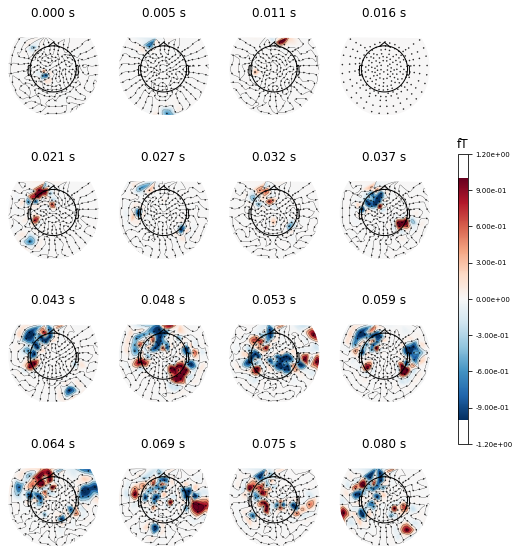

In [117]:
sel_info = mne.pick_info(raw.info, mne.pick_types(raw.info, meg=True)) 
evoked = mne.EvokedArray(layer_4.reshape(208, 81), info=sel_info)
fig = evoked.plot_topomap(times=np.linspace(0.0, 0.08, 16),
        ncols=4,
        vlim=(min(layer_4), max(layer_4)),
        nrows="auto",
        colorbar=True,
        res=128,
        scalings=1.0,
        size=1,
        cbar_fmt="%.2e"
        )
fig.savefig("fbank_layer1.pdf")

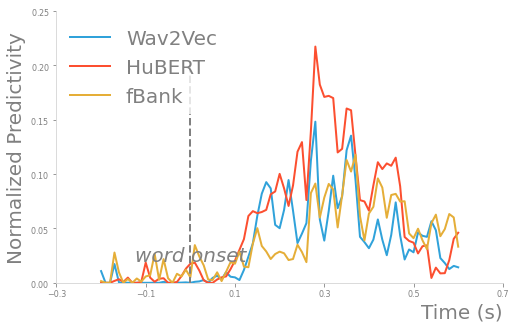

In [262]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

plt.ylim(0.0, 0.25)

t = np.linspace(-0.2, 0.6, ntime)

names = ["Wav2Vec", "HuBERT", "fBank"]

cmap = cc.glasbey_hv
colors = {n: cmap[i] for i, n in enumerate(names)}

for name in names:
    if name in "Wav2Vec":
        x = np.mean(Wav2Vec_corrs,axis=0).reshape(208,81).mean(0)
    elif name in "HuBERT":
        x = np.mean(Hubert_corrs,axis=0).reshape(208,81).mean(0)
    elif name in "fBank":
        x = fbank_corrs[0].reshape(208,81).mean(0)
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=2, label=name)
    
plt.vlines(0.0, 0.2, 0.00, linestyle='--', lw=2, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=20, labelcolor="gray", edgecolor="none", bbox_to_anchor=(0.4, 1))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Normalized Predictivity", size=20, color="gray")
plt.xlabel("Time (s)", size=20, loc="right", color="gray")

plt.text(0.0, 0.02, "word onset", size=20, color="gray", fontstyle="italic", ha="center")
plt.savefig("./speechmodels-all.pdf")
plt.show()

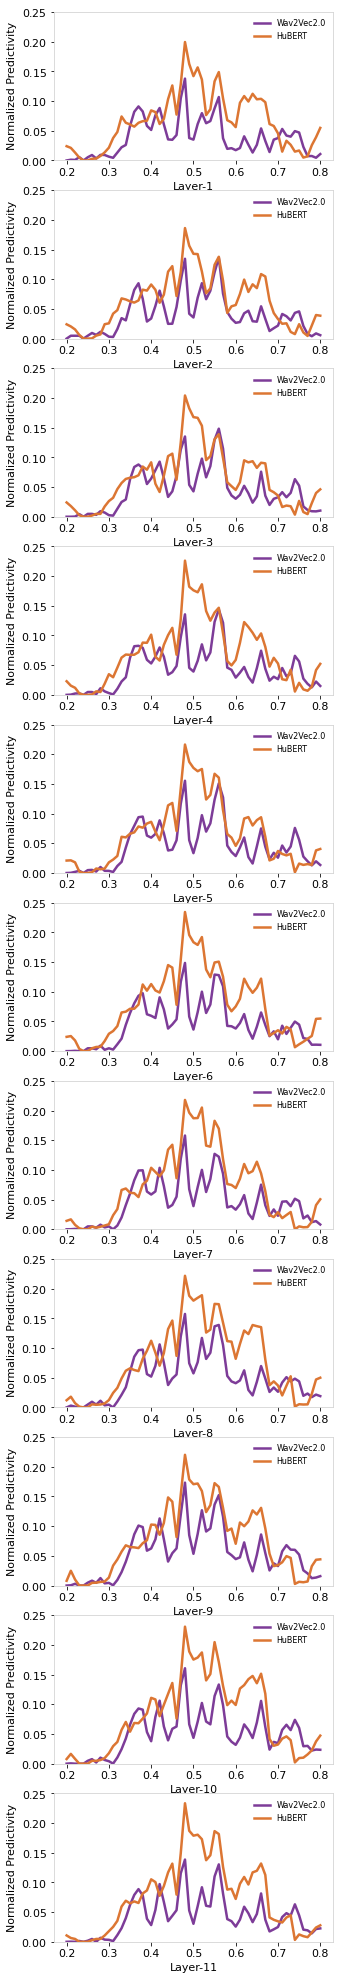

In [259]:
t = np.linspace(0.2, 0.8, ntime-20)

groups = {
    "Layer-1": ["Wav2Vec2.0", "HuBERT"],
    "Layer-2": ["Wav2Vec2.0", "HuBERT"],
    "Layer-3": ["Wav2Vec2.0", "HuBERT"],
    "Layer-4": ["Wav2Vec2.0", "HuBERT"],
    "Layer-5": ["Wav2Vec2.0", "HuBERT"],
    "Layer-6": ["Wav2Vec2.0", "HuBERT"],
    "Layer-7": ["Wav2Vec2.0", "HuBERT"],
    "Layer-8": ["Wav2Vec2.0", "HuBERT"],
    "Layer-9": ["Wav2Vec2.0", "HuBERT"],
    "Layer-10": ["Wav2Vec2.0", "HuBERT"],
    "Layer-11": ["Wav2Vec2.0", "HuBERT"],
    #"Layer-12": ["Wav2Vec2.0", "HuBERT"],
}

s_colors = {
    "Wav2Vec2.0": "#7D3C98",
    "HuBERT": "#DC7633",
}

# lag_colors = {
#     "BERT5-res3": "#E74C3C",
#     "BERT5-res2": "#27AE60", 
#     "BERT5-res1": "#F1C40F",
#     "BERT5-res3-R": "#E74C3C",
#     "BERT5-res2-R": "#27AE60", 
#     "BERT5-res1-R": "#F1C40F",
#     "BERT5-lag3": "#2980B9",
#     "BERT5-lag2": "#9B59B6",
#     "BERT5-lag1": "#D35400",
#     "BERT5-lag3-R": "#2980B9",
#     "BERT5-lag2-R": "#9B59B6",
#     "BERT5-lag1-R": "#D35400",
# }

fig, axs = plt.subplots(len(groups), 1, figsize=(5, 35.5), sharey=True)
plt.ylim(0.0, 0.25)
sem_scale = 1
max_value = 0
min_value = 0
for i, (layer, features) in enumerate(groups.items()):
    for name in features:
        if name in "Wav2Vec2.0":
            x = Wav2Vec_corrs[i].reshape(208,81).mean(0)
        elif name in "HuBERT":
            x = Hubert_corrs[i].reshape(208,81).mean(0)
        color = s_colors[name]
        label = name
            
        axs[i].plot(t, x[20:], color=color, lw=2.5, label=label)
        #axs[i].fill_between(t, mean[20:]-sem[20:]*sem_scale, mean[20:]+sem[20:]*sem_scale, alpha=0.3, color=color)

#         if max(mean+sem*sem_scale) > max_value:
#             max_value = max(mean+sem*sem_scale)

#         if min(mean-sem*sem_scale) < min_value:
#             min_value = min(mean-sem*sem_scale)
            
    axs[i].set_xlabel(layer)
    axs[i].set_ylabel("Normalized Predictivity")
    axs[i].legend(fontsize=8, edgecolor="none", bbox_to_anchor=(1.0, 1.0), ncols=1)

# for i, (lag, features) in enumerate(groups.items()):
#     idx = max_value + 0.00006
#     for name in features:
#         scores = all_r2s[name]
#         pvalues = all_sig[name]

#         r2s_scores = r2s_corrected(scores, pvalues)
#         pvalues = timewise_corrected_ttest_1samp(r2s_scores)

#         onestar = np.zeros(ntime)
#         onestar[20:] = (pvalues[20:] < 0.05) * idx
        
#         if "res" in name:
#             color = "#F39C12"
#         elif "lag" in name:
#             color = "#3498DB"
#         else:
#             color = s_colors[name]

#         onesig = False
#         for j in range(ntime-20):
#             if onestar[j+20] > 0:
#                 axs[i].scatter(t[j], onestar[j+20], marker="*", s=2, color=color)
#                 onesig = True

#         if onesig:
#             idx += 0.00003
#             onesig = False

#     #axs[i].vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
#     axs[i].axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)
    
#     axs[i].tick_params(
#             axis='both',
#             which='both',            
#             labelsize=10,
#             labelcolor="gray",
#             color="gray"
#         )

#     axs[i].spines[["right", "top"]].set_visible(False)
#     if i != 0:
#         axs[i].spines[["left"]].set_visible(False)
#         axs[i].tick_params(
#             axis='y',
#             which='both',            
#             left=False,         
#             labelleft=False)
    
#     axs[i].set_xticks([0.2, 0.6])

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

# plt.xticks(plt.xticks()[0][::2])

# plt.ylabel("Mean significative $R^2$", size=8, color="gray")
# plt.xlabel("Time (s)", size=8, loc="right", color="gray")

# #plt.text(0.2, max_value, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

# plt.savefig("../figures/r2_bert_lag_res.png", bbox_inches="tight")
plt.savefig("./layers_speech_models.pdf", bbox_inches="tight")
plt.show()

In [263]:
subject_corrs = []
for i in np.arange(1,28):
    nc_1 = np.load("predictions_results_meg/subject_"+str(i)+"_kernel_ridge.npy")
    nc_1[nc_1<0.01] = 0.0
    subject_corrs.append(nc_1)

ValueError: x and y must have same first dimension, but have shapes (61,) and (81,)

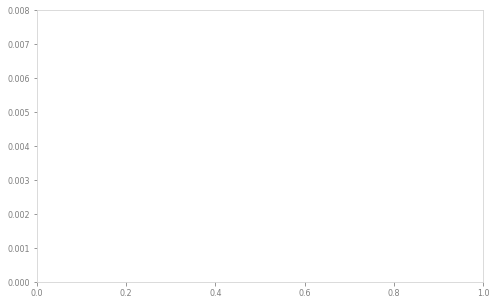

In [312]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

plt.ylim(0.0, 0.008)

t = np.linspace(0.2, 0.8, ntime-20)

#names = ["Wav2Vec", "HuBERT", "fBank"]

cmap = cc.glasbey_hv
colors = {n: cmap[i] for i, n in enumerate(np.arange(27))}

for name in np.arange(27):
    x = np.array(subject_corrs[name]).reshape(208,81).mean(0)
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=2, label='Subject_'+str(name+1))
    
plt.vlines(0.0, 0.008, 0.00, linestyle='--', lw=2, color="gray")

#plt.gca().spines[["right", "top"]].set_visible(False)
#plt.gca().legend(fontsize=20, labelcolor="gray", edgecolor="none", bbox_to_anchor=(0.4, 1))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Normalized Predictivity", size=20, color="gray")
plt.xlabel("Time (s)", size=20, loc="right", color="gray")

plt.text(0.0, 0.008, "word onset", size=20, color="gray", fontstyle="italic", ha="center")
plt.savefig("./subjects-all.pdf")
plt.show()

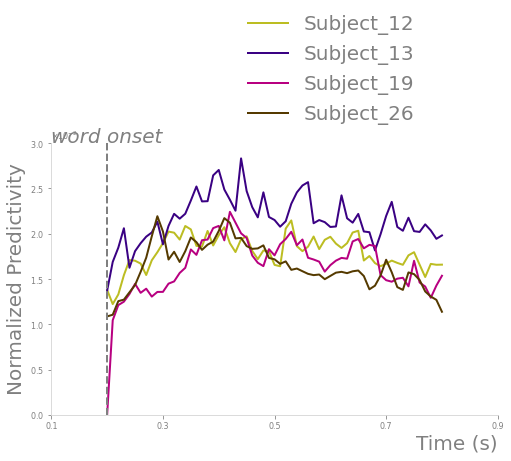

In [318]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

plt.ylim(0.0, 0.03)

t = np.linspace(0.2, 0.8, ntime-20)

#names = ["Wav2Vec", "HuBERT", "fBank"]

cmap = cc.glasbey_hv
colors = {n: cmap[i] for i, n in enumerate(np.arange(27))}

for name in [11,12,18,25]:
    x = np.ma.masked_equal(np.array(subject_corrs[name]).reshape(208,81),0).mean(0).data[20:]
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=2, label='Subject_'+str(name+1))
    
plt.vlines(0.2, 0.03, 0.00, linestyle='--', lw=2, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=20, labelcolor="gray", edgecolor="none", bbox_to_anchor=(0.4, 1))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Normalized Predictivity", size=20, color="gray")
plt.xlabel("Time (s)", size=20, loc="right", color="gray")

plt.text(0.2, 0.03, "word onset", size=20, color="gray", fontstyle="italic", ha="center")
plt.savefig("./subjects-all.pdf")
plt.show()

In [304]:
np.ma.masked_equal(np.array(subject_corrs[name]).reshape(208,81),0).mean(0).data.shape

(81,)

In [503]:
models = ['contrege_complete_predictions','contrege_incomplete_predictions','incontrege_predictions','bert_residual_syntax_lh_contrege_complete_predictions',
         'bert_residual_syntax_lh_contrege_incomplete_predictions','bert_residual_syntax_lh_incontrege_predictions']

count = 0
Contrege_corrs = []
for eachmodel in models[:]:
    for i in np.arange(1,2):
        nc_1 = np.load("predictions_results_meg/subject_"+str(i)+"_kernel_ridge.npy")
        if count<3:
            corr_1 = np.load("./meg_sub"+str(i)+"_predictions/"+eachmodel+"/0_corr.npy")[:, 0]
        else:
            corr_1 = np.load("./meg_sub"+str(i)+"_predictions/"+eachmodel+"/0_corr.npy")[:, 0]
        count+=1
        layer_1 = corr_1 / nc_1
        layer_1[layer_1 > 1.0] = 1.0
        layer_1[layer_1 < -1.0] = -1.0
        layer_1[nc_1 <= 0.01] = 0.0
        layer_1[layer_1<0.0] = 0.0
        Contrege_corrs.append(layer_1)

# Contrege_incorrs = []
# for i in np.arange(1,2):
#     nc_1 = np.load("predictions_results_meg/subject_"+str(i)+"_kernel_ridge.npy")
#     corr_1 = np.load("./meg_sub"+str(i)+"_predictions/contrege_incomplete_predictions/0_corr.npy")[:, 0]
#     layer_1 = corr_1 / nc_1
#     layer_1[layer_1 > 1.0] = 1.0
#     layer_1[layer_1 < -1.0] = -1.0
#     layer_1[nc_1 <= 0.01] = 0.0
#     layer_1[layer_1<0.0] = 0.0
#     Contrege_incorrs.append(layer_1)
    
# InContrege_corrs = []
# for i in np.arange(1,2):
#     nc_1 = np.load("predictions_results_meg/subject_"+str(i)+"_kernel_ridge.npy")
#     corr_1 = np.load("./meg_sub"+str(i)+"_predictions/incontrege_predictions/0_corr.npy")[:, 0]
#     layer_1 = corr_1 / nc_1
#     layer_1[layer_1 > 1.0] = 1.0
#     layer_1[layer_1 < -1.0] = -1.0
#     layer_1[nc_1 <= 0.01] = 0.0
#     layer_1[layer_1<0.0] = 0.0
#     InContrege_corrs.append(layer_1)

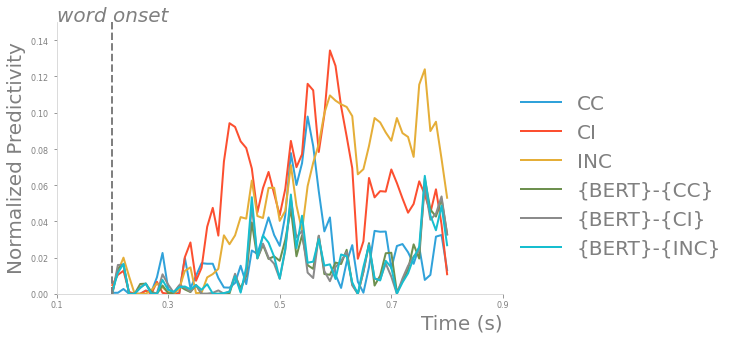

In [504]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

plt.ylim(0.0, 0.15)

t = np.linspace(0.2, 0.8, ntime-20)

names = ["CC", "CI", "INC","{BERT}-{CC}", "{BERT}-{CI}", "{BERT}-{INC}"]

cmap = cc.glasbey_hv
colors = {n: cmap[i] for i, n in enumerate(names)}

count = 0
for name in names[:]:
    x = Contrege_corrs[count].reshape(208,81).mean(0)[20:]
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=2, label=name)
    count+=1
    
plt.vlines(0.2, 0.15
           , 0.00, linestyle='--', lw=2, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=20, labelcolor="gray", edgecolor="none", bbox_to_anchor=(1, 0.8))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Normalized Predictivity", size=20, color="gray")
plt.xlabel("Time (s)", size=20, loc="right", color="gray")

plt.text(0.2, 0.15, "word onset", size=20, color="gray", fontstyle="italic", ha="center")
plt.savefig("./syntax-all.pdf")
plt.show()

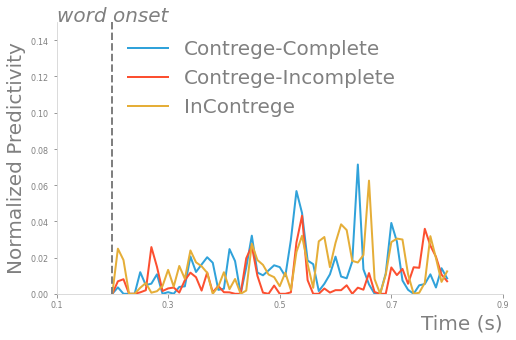

In [400]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='gray', labelsize=8)

plt.ylim(0.0, 0.15)

t = np.linspace(0.2, 0.8, ntime-20)

names = ["Contrege-Complete", "Contrege-Incomplete", "InContrege"]

cmap = cc.glasbey_hv
colors = {n: cmap[i] for i, n in enumerate(names)}

for name in names:
    if name in "Contrege-Complete":
        x = Contrege_corrs[6].reshape(208,81).mean(0)[20:]
    elif name in "Contrege-Incomplete":
        x = Contrege_incorrs[6].reshape(208,81).mean(0)[20:]
    elif name in "InContrege":
        x = InContrege_corrs[6].reshape(208,81).mean(0)[20:]
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=2, label=name)
    
plt.vlines(0.2, 0.15
           , 0.00, linestyle='--', lw=2, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=20, labelcolor="gray", edgecolor="none", bbox_to_anchor=(0.8, 1))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Normalized Predictivity", size=20, color="gray")
plt.xlabel("Time (s)", size=20, loc="right", color="gray")

plt.text(0.2, 0.15, "word onset", size=20, color="gray", fontstyle="italic", ha="center")
plt.savefig("./syntax-all.pdf")
plt.show()

In [90]:
models = ['bert_residual_syntax_lh_contrege_incomplete_predictions','bert_residual_syntax_lh_incontrege_predictions','bert_residual_syntax_lh_contrege_complete_predictions']

count = 0
speech_corrs = {}
for eachmodel in models[:]:
    speech_corrs[eachmodel] = []
    for i in np.arange(1,2):
        nc_1 = np.load("predictions_results_meg/subject_"+str(i)+"_kernel_ridge.npy")
        temp = []
        #sig_1 = np.load("./meg_sub1_predictions/"+eachmodel+"/"+str(6)+"_sig.npy")
        for j in np.arange(12):
            corr_1 = np.load("./meg_sub"+str(i)+"_predictions/"+eachmodel+"/"+str(j)+"_corr.npy")[:,0]
            #sig_1 = np.load("./meg_sub"+str(i)+"_predictions/"+eachmodel+"/"+str(j)+"_sig.npy")
            layer_1 = corr_1 / nc_1
            layer_1[layer_1 > 1.0] = 1.0
            layer_1[layer_1 < -1.0] = -1.0
            layer_1[nc_1 <= 0.00] = 0.0
            layer_1[layer_1<0.0] = 0.0
            #layer_1[sig_1==0] = 0.0
            temp.append(layer_1)
            
            #layer_1[layer_1<0.0] = 0.0
        speech_corrs[eachmodel].append(np.array(temp))
speech_corrs = np.array(list(speech_corrs.values())).reshape(len(models),i,12,208,81)
print(speech_corrs.shape)
#.

(3, 1, 12, 208, 81)


In [91]:
speech_corrs.shape

(3, 1, 12, 208, 81)

In [92]:
models = ['contrege_incomplete_predictions','incontrege_predictions','contrege_complete_predictions']

count = 0
basic_speech_corrs = {}
for eachmodel in models[:]:
    basic_speech_corrs[eachmodel] = []
    for i in range(1,2):
        nc_1 = np.load("predictions_results_meg/subject_"+str(i)+"_kernel_ridge.npy")
        temp = []
        for j in np.arange(1):
            corr_1 = np.load("./meg_sub"+str(i)+"_predictions/"+eachmodel+"/"+str(j)+"_corr.npy")[:, 0]
            layer_1 = corr_1 / nc_1
            layer_1[layer_1 > 1.0] = 1.0
            layer_1[layer_1 < -1.0] = -1.0
            layer_1[nc_1 <= 0.00] = 0.0
            layer_1[layer_1<0.0] = 0.0
            temp.append(layer_1)
            
            #layer_1[layer_1<0.0] = 0.0
        basic_speech_corrs[eachmodel].append(np.array(temp))
basic_speech_corrs = np.array(list(basic_speech_corrs.values())).reshape(len(models),i,1, 208, 81)

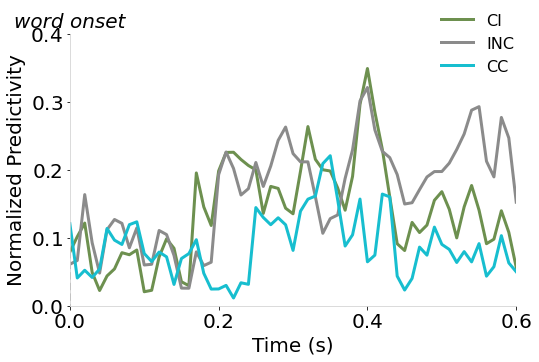

In [100]:
sem_scale = 1
ntime = 81
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 11, 'axes.edgecolor': "lightgray"})
plt.tick_params(which="both", colors='black', labelsize=20)

plt.ylim(0.0, 0.4)
plt.xlim(0.0, 0.6)

t = np.linspace(0.0, 0.6, ntime-20)

names = ["BERT-CI", "BERT-INC", "BERT-CC", "CI", "INC", "CC"]
#names = ["Wav2Vec2.0", "HuBERT", "Data2Vec"]

cmap = cc.glasbey_hv
colors = {n: cmap[i] for i, n in enumerate(names)}

count = 3
basic = 0

max_value = 0
min_value = 0
for name in names[3::]:
    if count<3:
        mean, sem = np.mean(np.mean(np.median(speech_corrs[count], axis=0),axis=0),axis=0)[20:], scipy.stats.sem(np.mean(np.median(speech_corrs[count], axis=0),axis=0),axis=0)[20:]
        x = np.mean(np.mean(np.median(speech_corrs[count], axis=0),axis=0),axis=0)[20:]
    else:
        mean, sem = np.mean(np.mean(np.median(basic_speech_corrs[basic], axis=0),axis=0),axis=0)[20:], scipy.stats.sem(np.mean(np.median(basic_speech_corrs[basic], axis=0),axis=0),axis=0)[20:]
        x = np.mean(np.mean(np.median(basic_speech_corrs[basic], axis=0),axis=0),axis=0)[20:]
        basic+=1
    
    if max(mean+sem*sem_scale) > max_value:
        max_value = max(mean+sem*sem_scale)
        
    if min(mean-sem*sem_scale) < min_value:
        min_value = min(mean-sem*sem_scale)
    
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=3, label=name)
    #plt.fill_between(t, mean-sem*sem_scale, mean+sem*sem_scale, alpha=0.3, color=color)
    count+=1

# idx = max_value + 0.00006
# for name in names[1:3]:
# #     scores = all_corr[name]
# #     pvalues = all_sig[name]
    
# #     corr_scores = corr_corrected(scores, pvalues, corr_idx=0)
# #     pvalues = timewise_corrected_ttest_1samp(corr_scores)
    
#     #onestar = np.zeros(ntime)
#     #onestar[20:] = (True) * idx
    
#     onesig = False
#     for i in range(20,ntime):
#         #if onestar[i] > 0:
#             plt.scatter(i, 0.27, marker="*", s=2, color=colors[name])
#             onesig = True
            
#     if onesig:
#         idx += 0.002
#         onesig = False
    
plt.vlines(0.0, 0.08
           , 0.00, linestyle='--', lw=2, color="gray")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=16, labelcolor="black", edgecolor="none", bbox_to_anchor=(0.8, 0.8))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)

plt.xticks(plt.xticks()[0][::2])

plt.ylabel("Normalized Predictivity", size=20, color="black")
plt.xlabel("Time (s)", size=20, loc="center", color="black")

plt.text(0.0, 0.41, "word onset", size=20, color="black", fontstyle="italic", ha="center")
plt.savefig("./bert_parsers.pdf", bbox_inches="tight")
plt.savefig("./bert_parsers.png", bbox_inches="tight")
plt.show()

In [56]:
subject_corrs = []    
for i in np.arange(1,28):
    nc_1 = np.load("predictions_results_meg/subject_"+str(i)+"_kernel_ridge.npy")
    nc_1[nc_1<0.0] = 0.0
    subject_corrs.append(np.array(nc_1))
subject_corrs = np.array(subject_corrs).reshape(27,208,81)

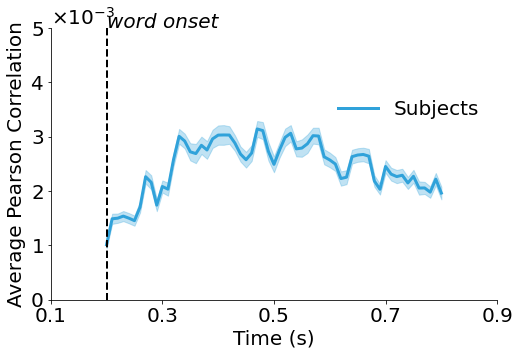

In [58]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 20, 'axes.edgecolor': "black"})
plt.tick_params(which="both", colors='black', labelsize=20)

plt.ylim(0.00, 0.005)

t = np.linspace(0.2, 0.8, ntime-20)

names = ["Subjects"]
#names = range(1,28)

cmap = cc.glasbey_hv
colors = {n: cmap[i] for i, n in enumerate(names)}

count = 0
basic = 0
sem_sclae =1
mean, sem = np.mean(np.median(subject_corrs, axis=0),axis=0)[20:], scipy.stats.sem(np.median(subject_corrs, axis=0),axis=0)[20:]
for name in names[:]:
    x = np.mean(np.median(subject_corrs,axis=0),axis=0)[20:]
    color = colors[name]
    style = None if name != "MEG" else ":"
    plt.plot(t, x, color=color, linestyle=style, lw=3, label=name)
    plt.fill_between(t, mean-sem*sem_scale, mean+sem*sem_scale, alpha=0.3, color=color)
    count+=1
    
    
plt.vlines(0.2, 0.005
           , 0.00, linestyle='--', lw=2, color="black")

plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().legend(fontsize=20, labelcolor="black", edgecolor="none", bbox_to_anchor=(1, 0.8))

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(20)

plt.xticks(plt.xticks()[0][::2], fontsize=20)

plt.ylabel("Average Pearson Correlation", size=20, color="black")
plt.xlabel("Time (s)", size=20, loc="center", color="black")

plt.text(0.2, 0.005, "word onset", size=20, color="black", fontstyle="italic", ha="left")
plt.savefig("./subjects-all.pdf")
plt.show()

In [994]:
from scipy.stats import wilcoxon
d1 = np.median(np.median(speech_corrs[2], axis=0), axis=0)
d2 = np.median(np.median(basic_speech_corrs[1], axis=0),axis=0)
res = wilcoxon(d1[:,0],d2[:,0])

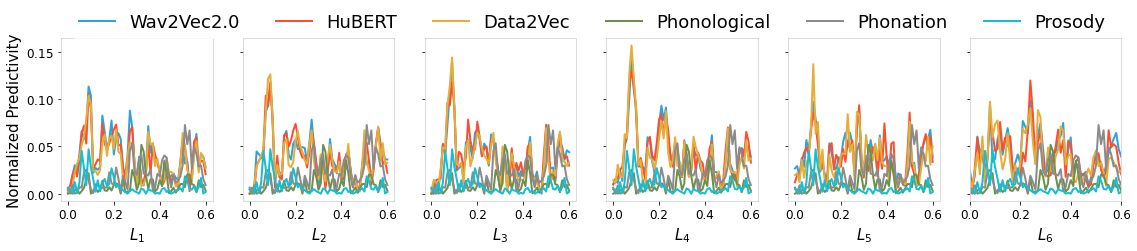

In [88]:
t = np.linspace(0.0, 0.6, ntime-20)

groups = {
    "$L_{1}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{2}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{3}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{4}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{5}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{6}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
}

names = ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"]
s_colors = {
    "Wav2Vec2.0": "#7D3C98",
    "HuBERT": "#DC7633",
    "Data2Vec": "#3498DB",
    "Phonological": "#AE2727",
    "Phonation": "#DE00F8",
    "Prosody": "#27AE60",
}

cmap = cc.glasbey_hv
s_colors = {n: cmap[i] for i, n in enumerate(names)}

# lag_colors = {
#     "BERT5-res3": "#E74C3C",
#     "BERT5-res2": "#27AE60", 
#     "BERT5-res1": "#F1C40F",
#     "BERT5-res3-R": "#E74C3C",
#     "BERT5-res2-R": "#27AE60", 
#     "BERT5-res1-R": "#F1C40F",
#     "BERT5-lag3": "#2980B9",
#     "BERT5-lag2": "#9B59B6",
#     "BERT5-lag1": "#D35400",
#     "BERT5-lag3-R": "#2980B9",
#     "BERT5-lag2-R": "#9B59B6",
#     "BERT5-lag1-R": "#D35400",
# }

fig, axs = plt.subplots(1, len(groups), figsize=(19, 3), sharey=True)


sem_scale = 1
max_value = 0
min_value = 0

for i, (lag, features) in enumerate(groups.items()):
    count = 0
    basic = 0
    for name in features:
        if name in ["Wav2Vec2.0", "HuBERT", "Data2Vec"]:
        #scores = all_r2s[name]
        #pvalues = all_sig[name]
            mean, sem = np.mean(np.median(speech_corrs[count], axis=0)[i,:,:],axis=0), scipy.stats.sem(np.median(speech_corrs[count], axis=0)[i,:,:],axis=0)
            count+=1
        else:
            mean, sem = np.mean(np.mean(np.median(basic_speech_corrs[basic], axis=0),axis=0),axis=0), scipy.stats.sem(np.mean(np.median(basic_speech_corrs[basic], axis=1),axis=0),axis=0)
            basic+=1
        
#         if "res" in name:
#             color = "#F39C12"
#             label = "BERT-5 res."
#         elif "lag" in name:
#             color = "#3498DB"
#             label = "BERT-5 lag"
#         else:
        color = s_colors[name]
        label = name
            
        axs[i].plot(t, mean[20:], color=color, lw=2, label=label)
        #axs[i].fill_between(t, mean[20:]-sem[20:]*sem_scale, mean[20:]+sem[20:]*sem_scale, alpha=0.3, color=color)

        if max(mean+sem*sem_scale) > max_value:
            max_value = max(mean+sem*sem_scale)

        if min(mean-sem*sem_scale) < min_value:
            min_value = min(mean-sem*sem_scale)
            
    axs[i].set_xlabel(lag,fontsize=15)
    axs[i].tick_params(which="both", colors='black', labelsize=12)
    
    if i == 0:
        axs[i].legend(fontsize=18, edgecolor="none", bbox_to_anchor=(7.0, 1.25), ncols=6)
        axs[i].set_ylabel("Normalized Predictivity", fontsize=15)
#     if i == 3:
        #axs[i].legend(fontsize=16, edgecolor="none", bbox_to_anchor=(4.5, 1.2), ncols=6)

# for i, (lag, features) in enumerate(groups.items()):
#     idx = max_value + 0.00006
#     for name in features:
#         scores = all_r2s[name]
#         pvalues = all_sig[name]

#         r2s_scores = r2s_corrected(scores, pvalues)
#         pvalues = timewise_corrected_ttest_1samp(r2s_scores)

#         onestar = np.zeros(ntime)
#         onestar[20:] = (pvalues[20:] < 0.05) * idx
        
#         if "res" in name:
#             color = "#F39C12"
#         elif "lag" in name:
#             color = "#3498DB"
#         else:
#             color = s_colors[name]

#         onesig = False
#         for j in range(ntime-20):
#             if onestar[j+20] > 0:
#                 axs[i].scatter(t[j], onestar[j+20], marker="*", s=2, color=color)
#                 onesig = True

#         if onesig:
#             idx += 0.00003
#             onesig = False

#     #axs[i].vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
#     axs[i].axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)
    
#     axs[i].tick_params(
#             axis='both',
#             which='both',            
#             labelsize=10,
#             labelcolor="gray",
#             color="gray"
#         )

#     axs[i].spines[["right", "top"]].set_visible(False)
#     if i != 0:
#         axs[i].spines[["left"]].set_visible(False)
#         axs[i].tick_params(
#             axis='y',
#             which='both',            
#             left=False,         
#             labelleft=False)
    
#     axs[i].set_xticks([0.2, 0.6])

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(8)
plt.xlim(0.0, 0.6)
# plt.xticks(plt.xticks()[0][::2])

# plt.ylabel("Mean significative $R^2$", size=8, color="gray")
# plt.xlabel("Time (s)", size=8, loc="right", color="gray")

# #plt.text(0.2, max_value, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

#plt.savefig("../figures/r2_bert_lag_res.png", bbox_inches="tight")
plt.savefig("./layers_parsers_1.pdf", bbox_inches="tight")
plt.show()

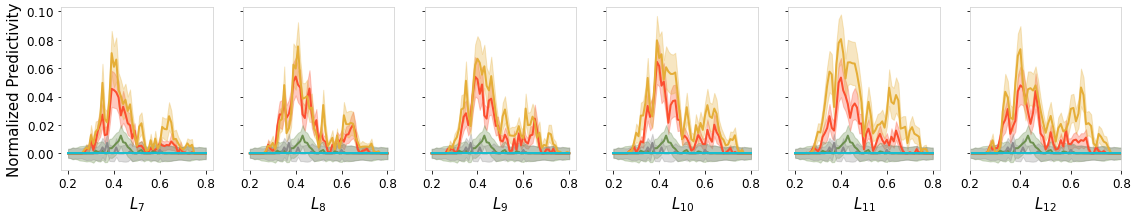

In [1175]:
t = np.linspace(0.2, 0.8, ntime-20)

groups = {
    "$L_{7}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{8}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{9}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{10}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{11}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
    "$L_{12}$": ["Wav2Vec2.0", "HuBERT", "Data2Vec", "Phonological", "Phonation", "Prosody"],
}

s_colors = {
    "Wav2Vec2.0": "#7D3C98",
    "HuBERT": "#DC7633",
    "Data2Vec": "#3498DB",
    "Phonological": "#AE2727",
    "Phonation": "#DE00F8",
    "Prosody": "#27AE60",
}

cmap = cc.glasbey_hv
s_colors = {n: cmap[i] for i, n in enumerate(names)}

# lag_colors = {
#     "BERT5-res3": "#E74C3C",
#     "BERT5-res2": "#27AE60", 
#     "BERT5-res1": "#F1C40F",
#     "BERT5-res3-R": "#E74C3C",
#     "BERT5-res2-R": "#27AE60", 
#     "BERT5-res1-R": "#F1C40F",
#     "BERT5-lag3": "#2980B9",
#     "BERT5-lag2": "#9B59B6",
#     "BERT5-lag1": "#D35400",
#     "BERT5-lag3-R": "#2980B9",
#     "BERT5-lag2-R": "#9B59B6",
#     "BERT5-lag1-R": "#D35400",
# }

fig, axs = plt.subplots(1, len(groups), figsize=(19, 3), sharey=True)

sem_scale = 1
max_value = 0
min_value = 0

for i, (lag, features) in enumerate(groups.items()):
    count = 0
    basic = 0
    for name in features:
        if name in ["Wav2Vec2.0", "HuBERT", "Data2Vec"]:
        #scores = all_r2s[name]
        #pvalues = all_sig[name]
            mean, sem = np.mean(np.median(speech_corrs[count], axis=0)[i+6,:,:],axis=0), scipy.stats.sem(np.median(speech_corrs[count], axis=0)[i+6,:,:],axis=0)
            count+=1
        else:
            mean, sem = np.mean(np.mean(np.median(basic_speech_corrs[basic], axis=0),axis=0),axis=0), scipy.stats.sem(np.mean(np.median(basic_speech_corrs[basic], axis=1),axis=0),axis=0)
            basic+=1
        
#         if "res" in name:
#             color = "#F39C12"
#             label = "BERT-5 res."
#         elif "lag" in name:
#             color = "#3498DB"
#             label = "BERT-5 lag"
#         else:
        color = s_colors[name]
        label = name
            
        axs[i].plot(t, mean[20:], color=color, lw=2, label=label)
        axs[i].fill_between(t, mean[20:]-sem[20:]*sem_scale, mean[20:]+sem[20:]*sem_scale, alpha=0.3, color=color)

        if max(mean+sem*sem_scale) > max_value:
            max_value = max(mean+sem*sem_scale)

        if min(mean-sem*sem_scale) < min_value:
            min_value = min(mean-sem*sem_scale)
            
    axs[i].set_xlabel(lag, fontsize=15)
    axs[i].tick_params(which="both", colors='black', labelsize=12)
    if i == 0:
        #axs[i].legend(fontsize=8, edgecolor="none", bbox_to_anchor=(7.3, 1.2), ncols=2)
        axs[i].set_ylabel("Normalized Predictivity",fontsize=15)
#     if i == 3:
        #axs[i].legend(fontsize=8, edgecolor="none", bbox_to_anchor=(4.5, 1.2), ncols=6)

# for i, (lag, features) in enumerate(groups.items()):
#     idx = max_value + 0.00006
#     for name in features:
#         scores = all_r2s[name]
#         pvalues = all_sig[name]

#         r2s_scores = r2s_corrected(scores, pvalues)
#         pvalues = timewise_corrected_ttest_1samp(r2s_scores)

#         onestar = np.zeros(ntime)
#         onestar[20:] = (pvalues[20:] < 0.05) * idx
        
#         if "res" in name:
#             color = "#F39C12"
#         elif "lag" in name:
#             color = "#3498DB"
#         else:
#             color = s_colors[name]

#         onesig = False
#         for j in range(ntime-20):
#             if onestar[j+20] > 0:
#                 axs[i].scatter(t[j], onestar[j+20], marker="*", s=2, color=color)
#                 onesig = True

#         if onesig:
#             idx += 0.00003
#             onesig = False

#     #axs[i].vlines(0.2, min_value, max_value, linestyle='--', lw=.8, color="gray")
#     axs[i].axhline(0.0, lw=1, color="gray", linestyle=":", zorder=0)
    
#     axs[i].tick_params(
#             axis='both',
#             which='both',            
#             labelsize=10,
#             labelcolor="gray",
#             color="gray"
#         )

#     axs[i].spines[["right", "top"]].set_visible(False)
#     if i != 0:
#         axs[i].spines[["left"]].set_visible(False)
#         axs[i].tick_params(
#             axis='y',
#             which='both',            
#             left=False,         
#             labelleft=False)
    
#     axs[i].set_xticks([0.2, 0.6])

mf = matplotlib.ticker.ScalarFormatter(useMathText=True)
mf.set_powerlimits((-2,2))
plt.gca().yaxis.set_major_formatter(mf)
plt.gca().yaxis.get_offset_text().set_size(10)
plt.xlim(0.2, 0.8)

#plt.xticks(plt.xticks()[0][::2])

# plt.ylabel("Mean significative $R^2$", size=8, color="gray")
# plt.xlabel("Time (s)", size=8, loc="right", color="gray")

# #plt.text(0.2, max_value, "word onset", size=8, color="gray", fontstyle="italic", ha="center")

#plt.savefig("../figures/r2_bert_lag_res.png", bbox_inches="tight")
plt.savefig("./layers_speech_6.pdf", bbox_inches="tight")
plt.show()